Problem Statement:
This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics

In [1]:
# importing required initial libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [2]:
df=pd.read_csv("baseball.csv")
df


W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  \
0    95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2   
1    83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   
2    81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   
3    76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7   
4    74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   
5    93  891  5509  1480  308  17  232  570  1151   88  670  609  3.80   7   
6    87  764  5567  1397  272  19  212  554  1227   63  698  652  4.03   3   
7    81  713  5485  1370  246  20  217  418  1331   44  693  646  4.05   0   
8    80  644  5485  1383  278  32  167  436  1310   87  642  604  3.74   1   
9    78  748  5640  1495  294  33  161  478  1148   71  753  694  4.31   3   
10   88  751  5511  1419  279  32  172  503  1233  101  733  680  4.24   5   
11   86  729  5459  1363  278  26  230  486  1392  121  618  572  3.57   5   
12   85  661  5417  1331  243  21  176  435  1150   52  675  630  3.94   2   
13   76  656  5544  1379  262  22  198  478  1336   69  726  677  4.16   6   
14   68  694  5600  1405  277  46  146  475  1119   78  729  664  4.14   5   
15  100  647  5484  1386  288  39  137  506  1267   69  525  478  2.94   1   
16   98  697  5631  1462  292  27  140  461  1322   98  596  532  3.21   0   
17   97  689  5491  1341  272  30  171  567  1518   95  608  546  3.36   6   
18   68  655  5480  1378  274  34  145  412  1299   84  737  682  4.28   1   
19   64  640  5571  1382  257  27  167  496  1255  134  754  700  4.33   2   
20   90  683  5527  1351  295  17  177  488  1290   51  613  557  3.43   1   
21   83  703  5428  1363  265  13  177  539  1344   57  635  577  3.62   4   
22   71  613  5463  1420  236  40  120  375  1150  112  678  638  4.02   0   
23   67  573  5420  1361  251  18  100  471  1107   69  760  698  4.41   3   
24   63  626  5529  1374  272  37  130  387  1274   88  809  749  4.69   1   
25   92  667  5385  1346  263  26  187  563  1258   59  595  553  3.44   6   
26   84  696  5565  1486  288  39  136  457  1159   93  627  597  3.72   7   
27   79  720  5649  1494  289  48  154  490  1312  132  713  659  4.04   1   
28   74  650  5457  1324  260  36  148  426  1327   82  731  655  4.09   1   
29   68  737  5572  1479  274  49  186  388  1283   97  844  799  5.04   4   

    SHO  SV    E  
0     8  56   88  
1    12  45   86  
2    10  38   79  
3     9  37  101  
4    12  35   86  
5    10  34   88  
6     4  48   93  
7    10  43   77  
8    12  60   95  
9    10  40   97  
10    9  45  119  
11   13  39   85  
12   12  46   93  
13   12  45   94  
14   15  28  126  
15   15  62   96  
16   13  54  122  
17   21  48  111  
18    7  40  116  
19    8  35   90  
20   14  50   88  
21   13  41   90  
22   12  35   77  
23   10  44   90  
24    7  35  117  
25   21  47   75  
26   18  41   78  
27   12  44   86  
28    6  41   92  
29    4  36   95

In [3]:
# Checking the dimensions of the dataset
print('No. of Rows :',df.shape[0])
print('No. of Columns :', df.shape[1])
pd.set_option('display.max_columns',None) # This will enable us to see truncated columns
df.head()

No. of Rows : 30
No. of Columns : 17


W    R    AB     H   2B  3B   HR   BB    SO   SB   RA   ER   ERA  CG  SHO  \
0  95  724  5575  1497  300  42  139  383   973  104  641  601  3.73   2    8   
1  83  696  5467  1349  277  44  156  439  1264   70  700  653  4.07   2   12   
2  81  669  5439  1395  303  29  141  533  1157   86  640  584  3.67  11   10   
3  76  622  5533  1381  260  27  136  404  1231   68  701  643  3.98   7    9   
4  74  689  5605  1515  289  49  151  455  1259   83  803  746  4.64   7   12   

   SV    E  
0  56   88  
1  45   86  
2  38   79  
3  37  101  
4  35   86

In [5]:
# Observations:

# This Dataset has 30 rows and 17 columns.
# Let's study the column's names and their charectaristics.

In [6]:
# checking columns names

df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [7]:
# Observations:

#  About the columns:-

# 1) W-This column shows the Total no of wins of each team.

# 2)  R-This column shows the Runs scored.

# 3)  AB-This column shows At bat:plate appearances,
#not including base on balls,being hit by pitch,sacrifices,interference,or obstruction

# 4) H-This column shows the hit.

# 5) 2B-This column shows the Double:hits on which the battle reaches second base safely 
#without the contribution of a fielding error

# 6) 3B-This column shows the Triple:hits on which the battle reaches third base safely 
#without the contribution of a fielding error.

# 7) HR-This column shows the Home runs.

# 8) BB-This column shows the Base on balls.

# 9) SO-This column shows the Run average.

# 10) SB- Stolen base: number of bases advanced by the runner while the ball is in the possession of the defense

# 11) RA-This column shows Run average.

# 12) ER-This column shows Earned run.

# 13) ERA-This column shows the Earned run average.

# 14) CG-This column shows the Complete game.

# 15) SHO-This column shows the shutout.

# 16) SV-This column shows the Save opportunity

# 17) E-This column shows the Errors.

In [8]:
# replacing the abbrevations with Complete word

df.columns=['Wins', 'Runs', 'At_Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns', 'Walks'
              , 'Strikeouts', 'Stolen_Bases', 'Runs_Allowed', 'Earned_Runs', 'Earned_Run_Average_(ERA)'
              ,  'Complete_Games', 'Shutouts', 'Saves', 'Errors']
df.head()

Wins  Runs  At_Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen_Bases  Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  \
0           104           641          601                      3.73   
1            70           700          653                      4.07   
2            86           640          584                      3.67   
3            68           701          643                      3.98   
4            83           803          746                      4.64   

   Complete_Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  
2              11        10     38      79  
3               7         9     37     101  
4               7        12     35      86

# Data Integrity Check

In [9]:
# Checking for the presense of any whitespaces, '?', 'NA', '-' in the dataset

In [10]:
df.isin(['NA','N/A','-',' ','?',' ?']).sum().any()

False

In [11]:
# Observations:

# No White spaces, 'NA', 'N/A', '-', '?', ' ?' present in the dataframe

# Duplicate Values Check

In [12]:
df.duplicated().sum()

0

In [13]:
duplicate = df[df.duplicated()]
 
print("Duplicate Rows :")
 
# Print the resultant Dataframe
duplicate

Duplicate Rows :


Empty DataFrame
Columns: [Wins, Runs, At_Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen_Bases, Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA), Complete_Games, Shutouts, Saves, Errors]
Index: []

In [14]:
# Observations:

# No duplicate values present in the dataframe

# Null Values Handling

In [15]:
 # Checking the sum of null values for all columns
    
df.isnull().sum().sum()

0

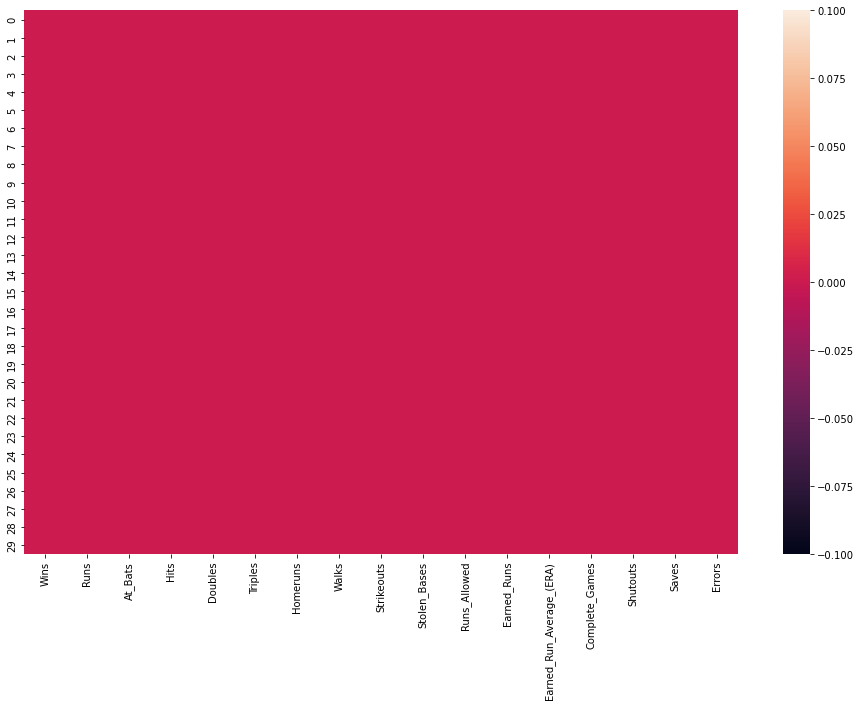

In [16]:
sns.set_palette('coolwarm_r')
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull())
plt.show()

In [17]:
# Observations:

# No null values are present in the total dataset.

# Checking different statistical parameter:

In [18]:
df.describe()

Wins        Runs      At_Bats         Hits     Doubles  \
count   30.000000   30.000000    30.000000    30.000000   30.000000   
mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
std     10.453455   58.761754    70.467372    57.140923   18.095405   
min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
max    100.000000  891.000000  5649.000000  1515.000000  308.000000   

         Triples    Homeruns       Walks  Strikeouts  Stolen_Bases  \
count  30.000000   30.000000   30.000000    30.00000     30.000000   
mean   31.300000  163.633333  469.100000  1248.20000     83.500000   
std    10.452355   31.823309   57.053725   103.75947     22.815225   
min    13.000000  100.000000  375.000000   973.00000     44.000000   
25%    23.000000  140.250000  428.250000  1157.50000     69.000000   
50%    31.000000  158.500000  473.000000  1261.50000     83.500000   
75%    39.000000  177.000000  501.250000  1311.50000     96.500000   
max    49.000000  232.000000  570.000000  1518.00000    134.000000   

       Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  Complete_Games  \
count     30.000000    30.000000                 30.000000       30.000000   
mean     688.233333   635.833333                  3.956333        3.466667   
std       72.108005    70.140786                  0.454089        2.763473   
min      525.000000   478.000000                  2.940000        0.000000   
25%      636.250000   587.250000                  3.682500        1.000000   
50%      695.500000   644.500000                  4.025000        3.000000   
75%      732.500000   679.250000                  4.220000        5.750000   
max      844.000000   799.000000                  5.040000       11.000000   

        Shutouts      Saves      Errors  
count  30.000000  30.000000   30.000000  
mean   11.300000  43.066667   94.333333  
std     4.120177   7.869335   13.958889  
min     4.000000  28.000000   75.000000  
25%     9.000000  37.250000   86.000000  
50%    12.000000  42.000000   91.000000  
75%    13.000000  46.750000   96.750000  
max    21.000000  62.000000  126.000000

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Wins                      30 non-null     int64  
 1   Runs                      30 non-null     int64  
 2   At_Bats                   30 non-null     int64  
 3   Hits                      30 non-null     int64  
 4   Doubles                   30 non-null     int64  
 5   Triples                   30 non-null     int64  
 6   Homeruns                  30 non-null     int64  
 7   Walks                     30 non-null     int64  
 8   Strikeouts                30 non-null     int64  
 9   Stolen_Bases              30 non-null     int64  
 10  Runs_Allowed              30 non-null     int64  
 11  Earned_Runs               30 non-null     int64  
 12  Earned_Run_Average_(ERA)  30 non-null     float64
 13  Complete_Games            30 non-null     int64  
 14  Shutouts    

In [21]:
# Observations:

# 1) No null values are present.

# 2) All of the features are numarical datatypes

# 3) Target variable is 'Wins' and it is a int64 datatype. So it is a Regression problem

# 4) Seems some skewness and outliers are present as there is a big jump between 75% quantile and max value of Runs,
#Complete_Games and Errors.

# 5) Seems outliers are present in the overall dataset.



# Visualization of data

<AxesSubplot:xlabel='Wins', ylabel='Count'>

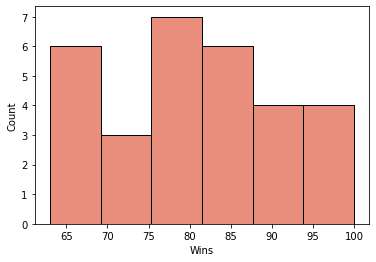

In [29]:
# Visualizing the Histogram of the Target Variable

sns.histplot(df['Wins'])

In [30]:
# Observation

# From the above histogram we can say that target column has normalized data and there is no skewness present.

# The minimum team win rate is 63 and the maximum is 100 also the team average win rate is 80.

# The team win rate is more between 75 to 80 and is low in the range of 70 to 75.

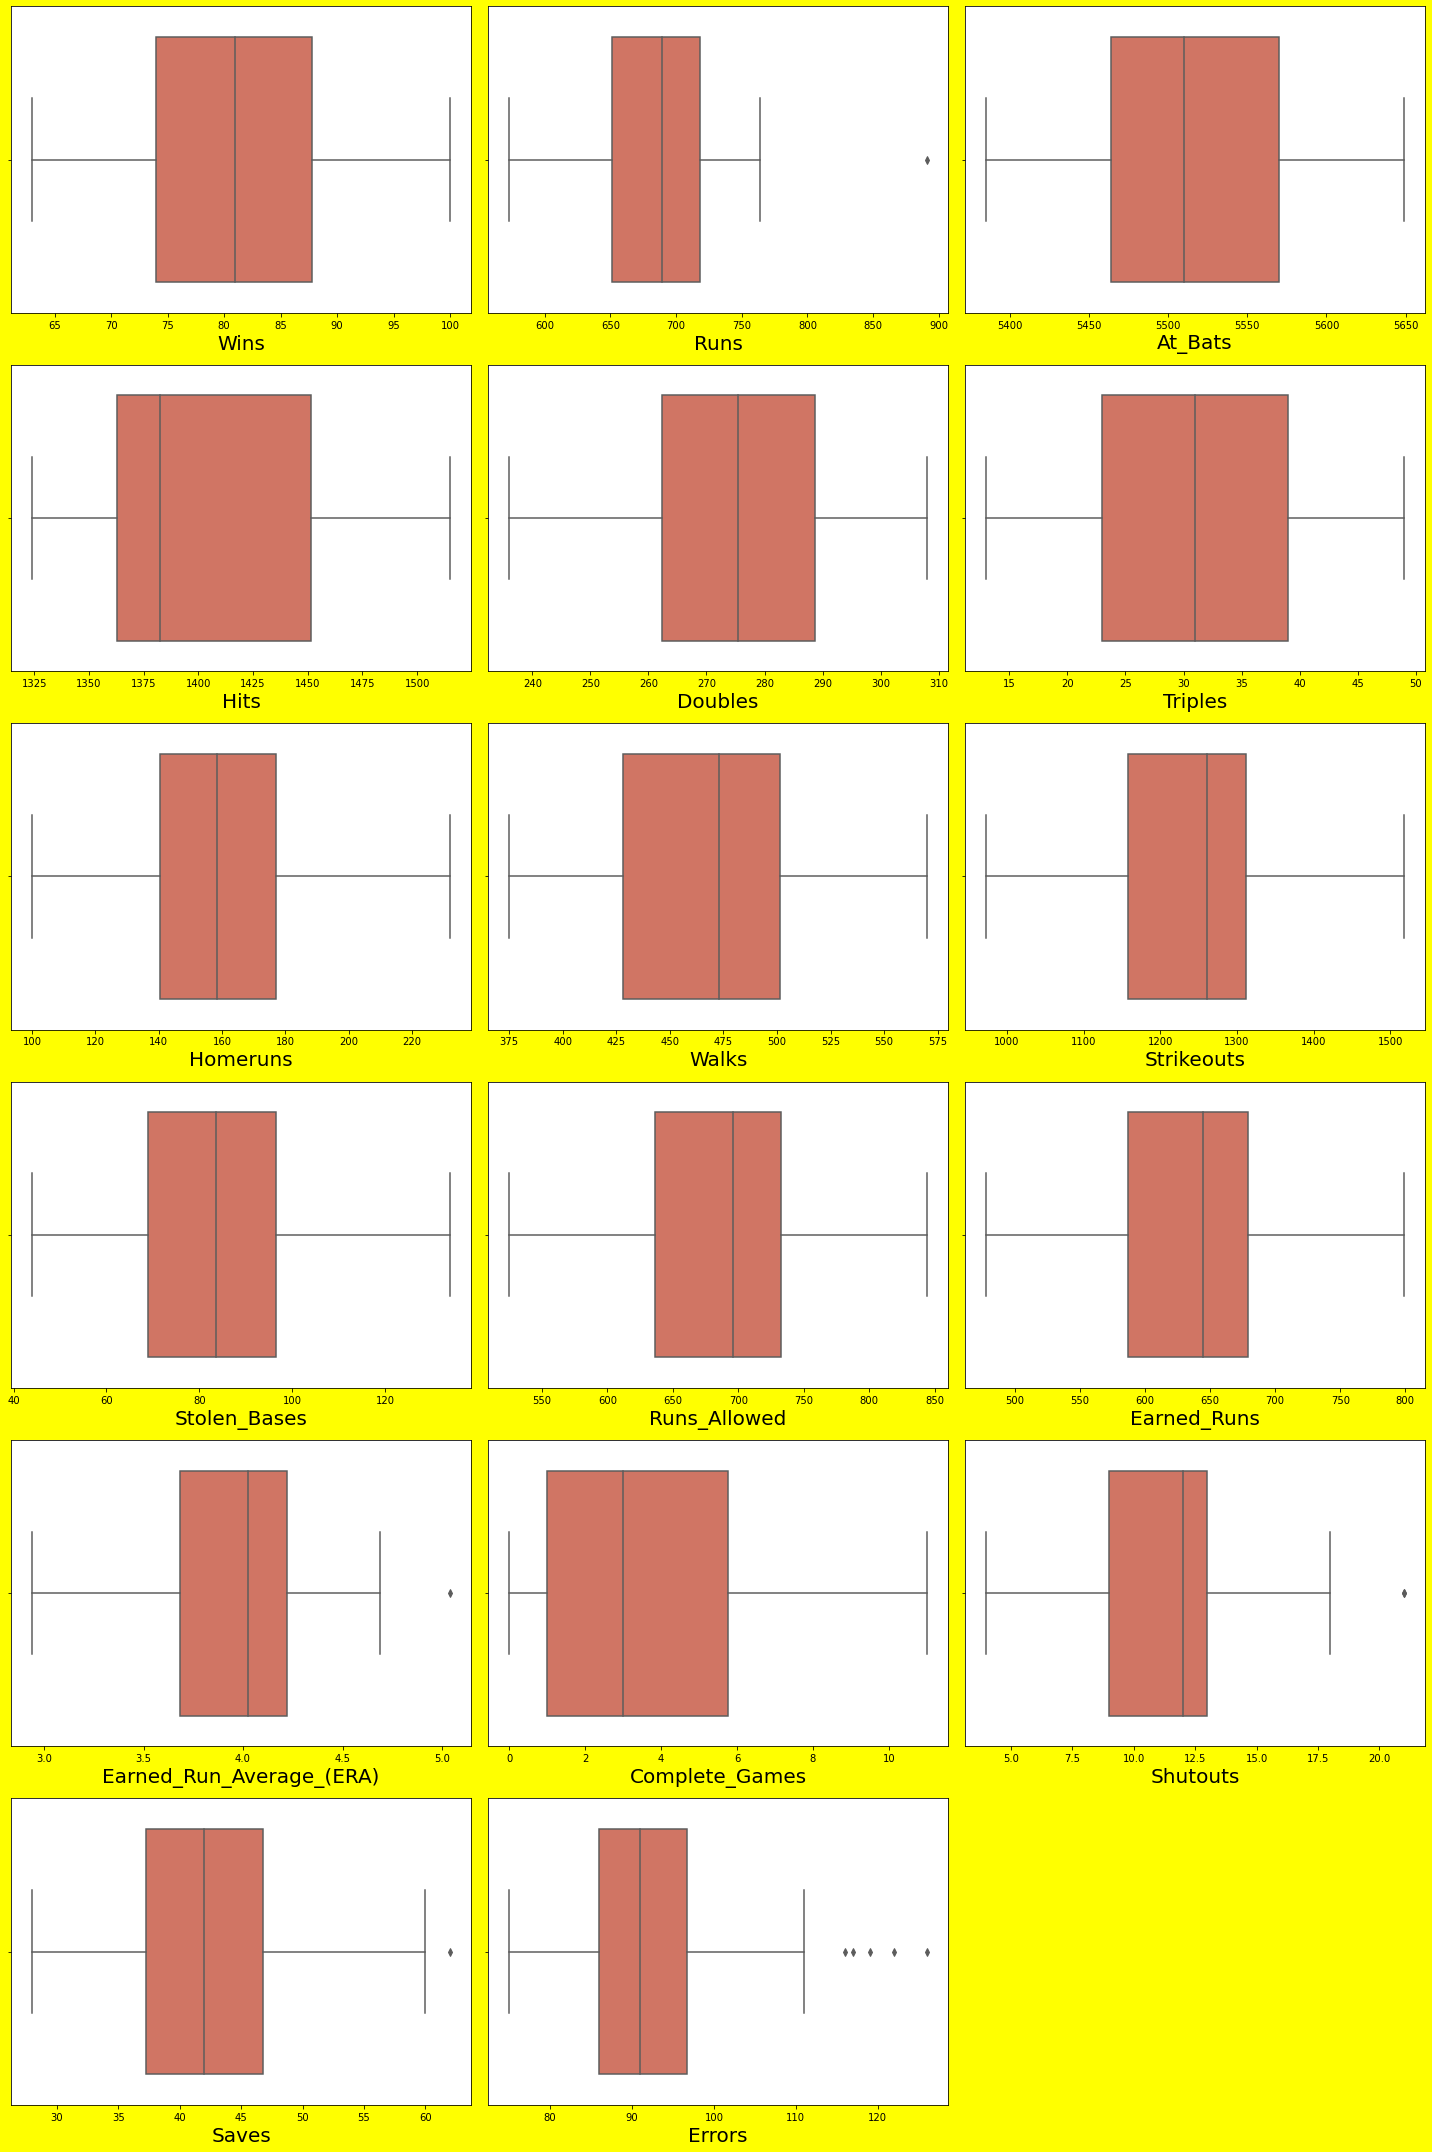

In [24]:
plt.figure(figsize=(20,30),facecolor='yellow' )
plno=1
for x in df:
    if plno<=17:
        plt.subplot(6,3,plno)
        sns.boxplot(df[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

In [25]:
# Observation

# There aee some outliers present.

# We will remove the outliers later

In [26]:
# We will do some more graphical charts

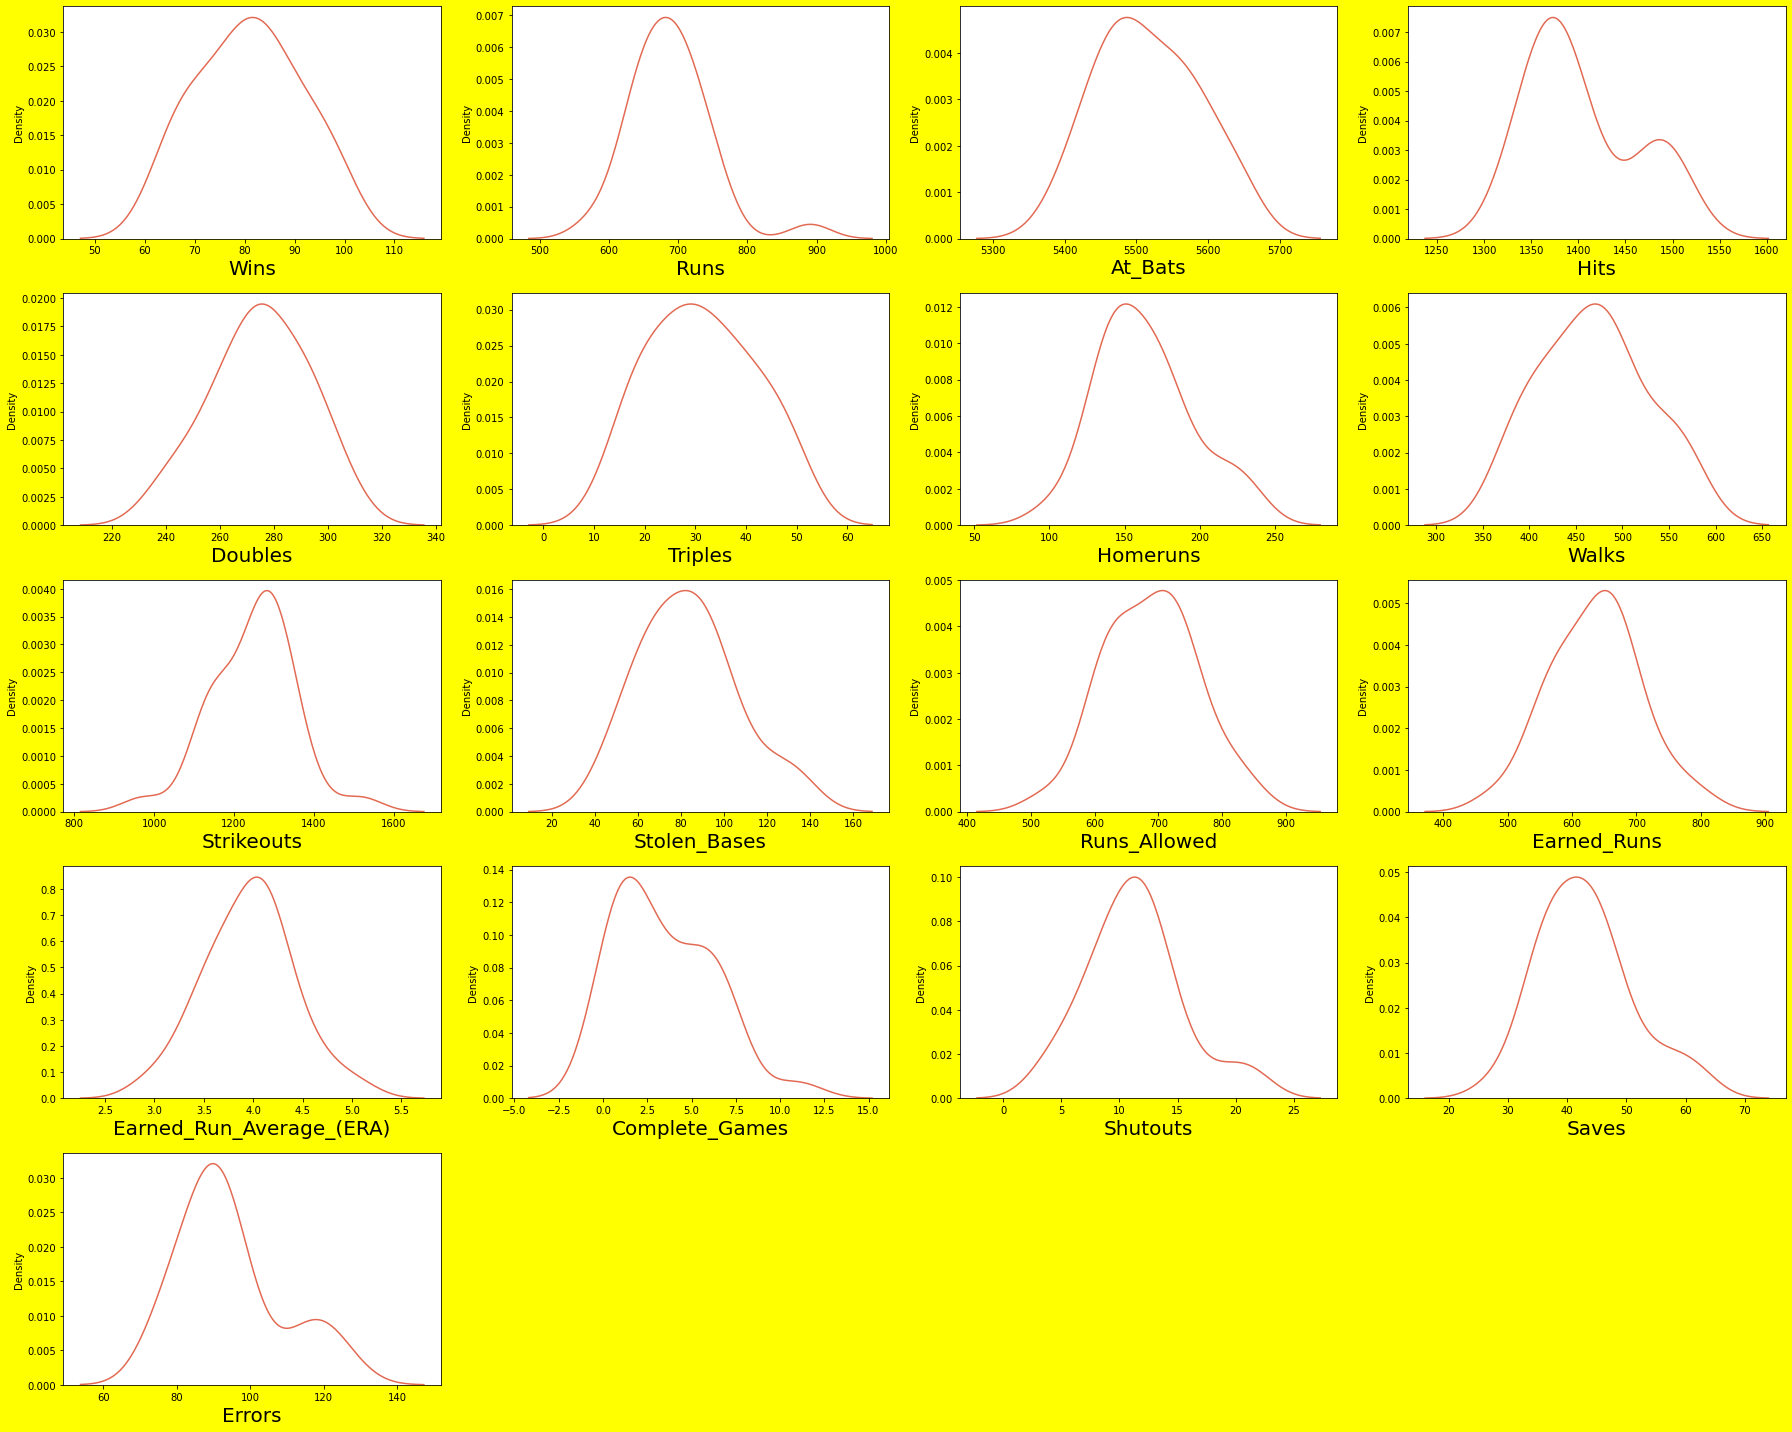

In [31]:
plt.figure(figsize=(25,20),facecolor='yellow' )
plno=1
for x in df:
    if plno<=17:
        plt.subplot(5,4,plno)
        sns.distplot(df[x], hist=False)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

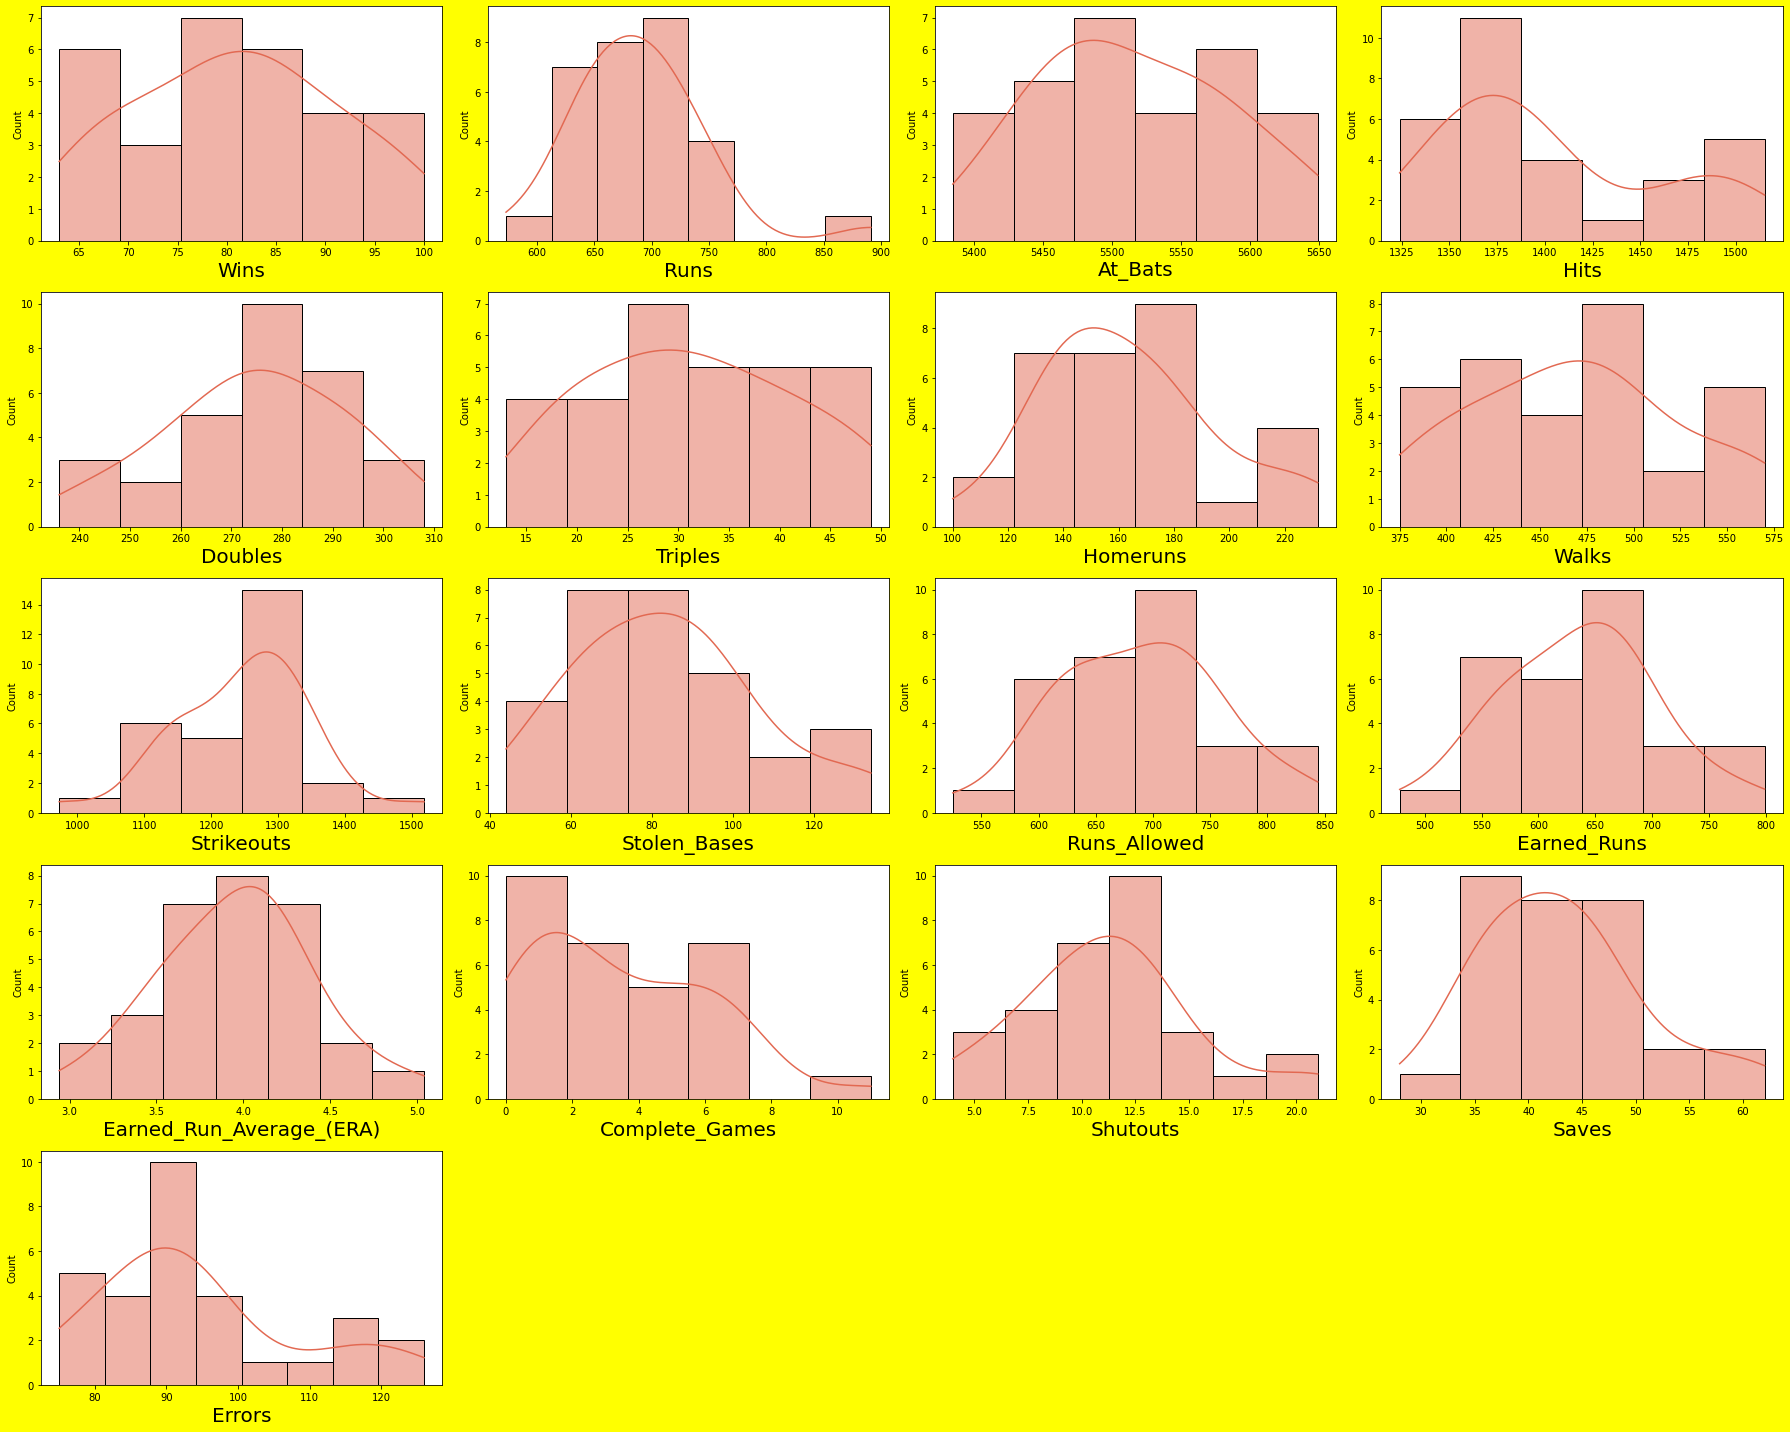

In [32]:
plt.figure(figsize=(25,20),facecolor='yellow' )
plno=1
for x in df:
    if plno<=17:
        plt.subplot(5,4,plno)
        sns.histplot(df[x], kde=True)
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()


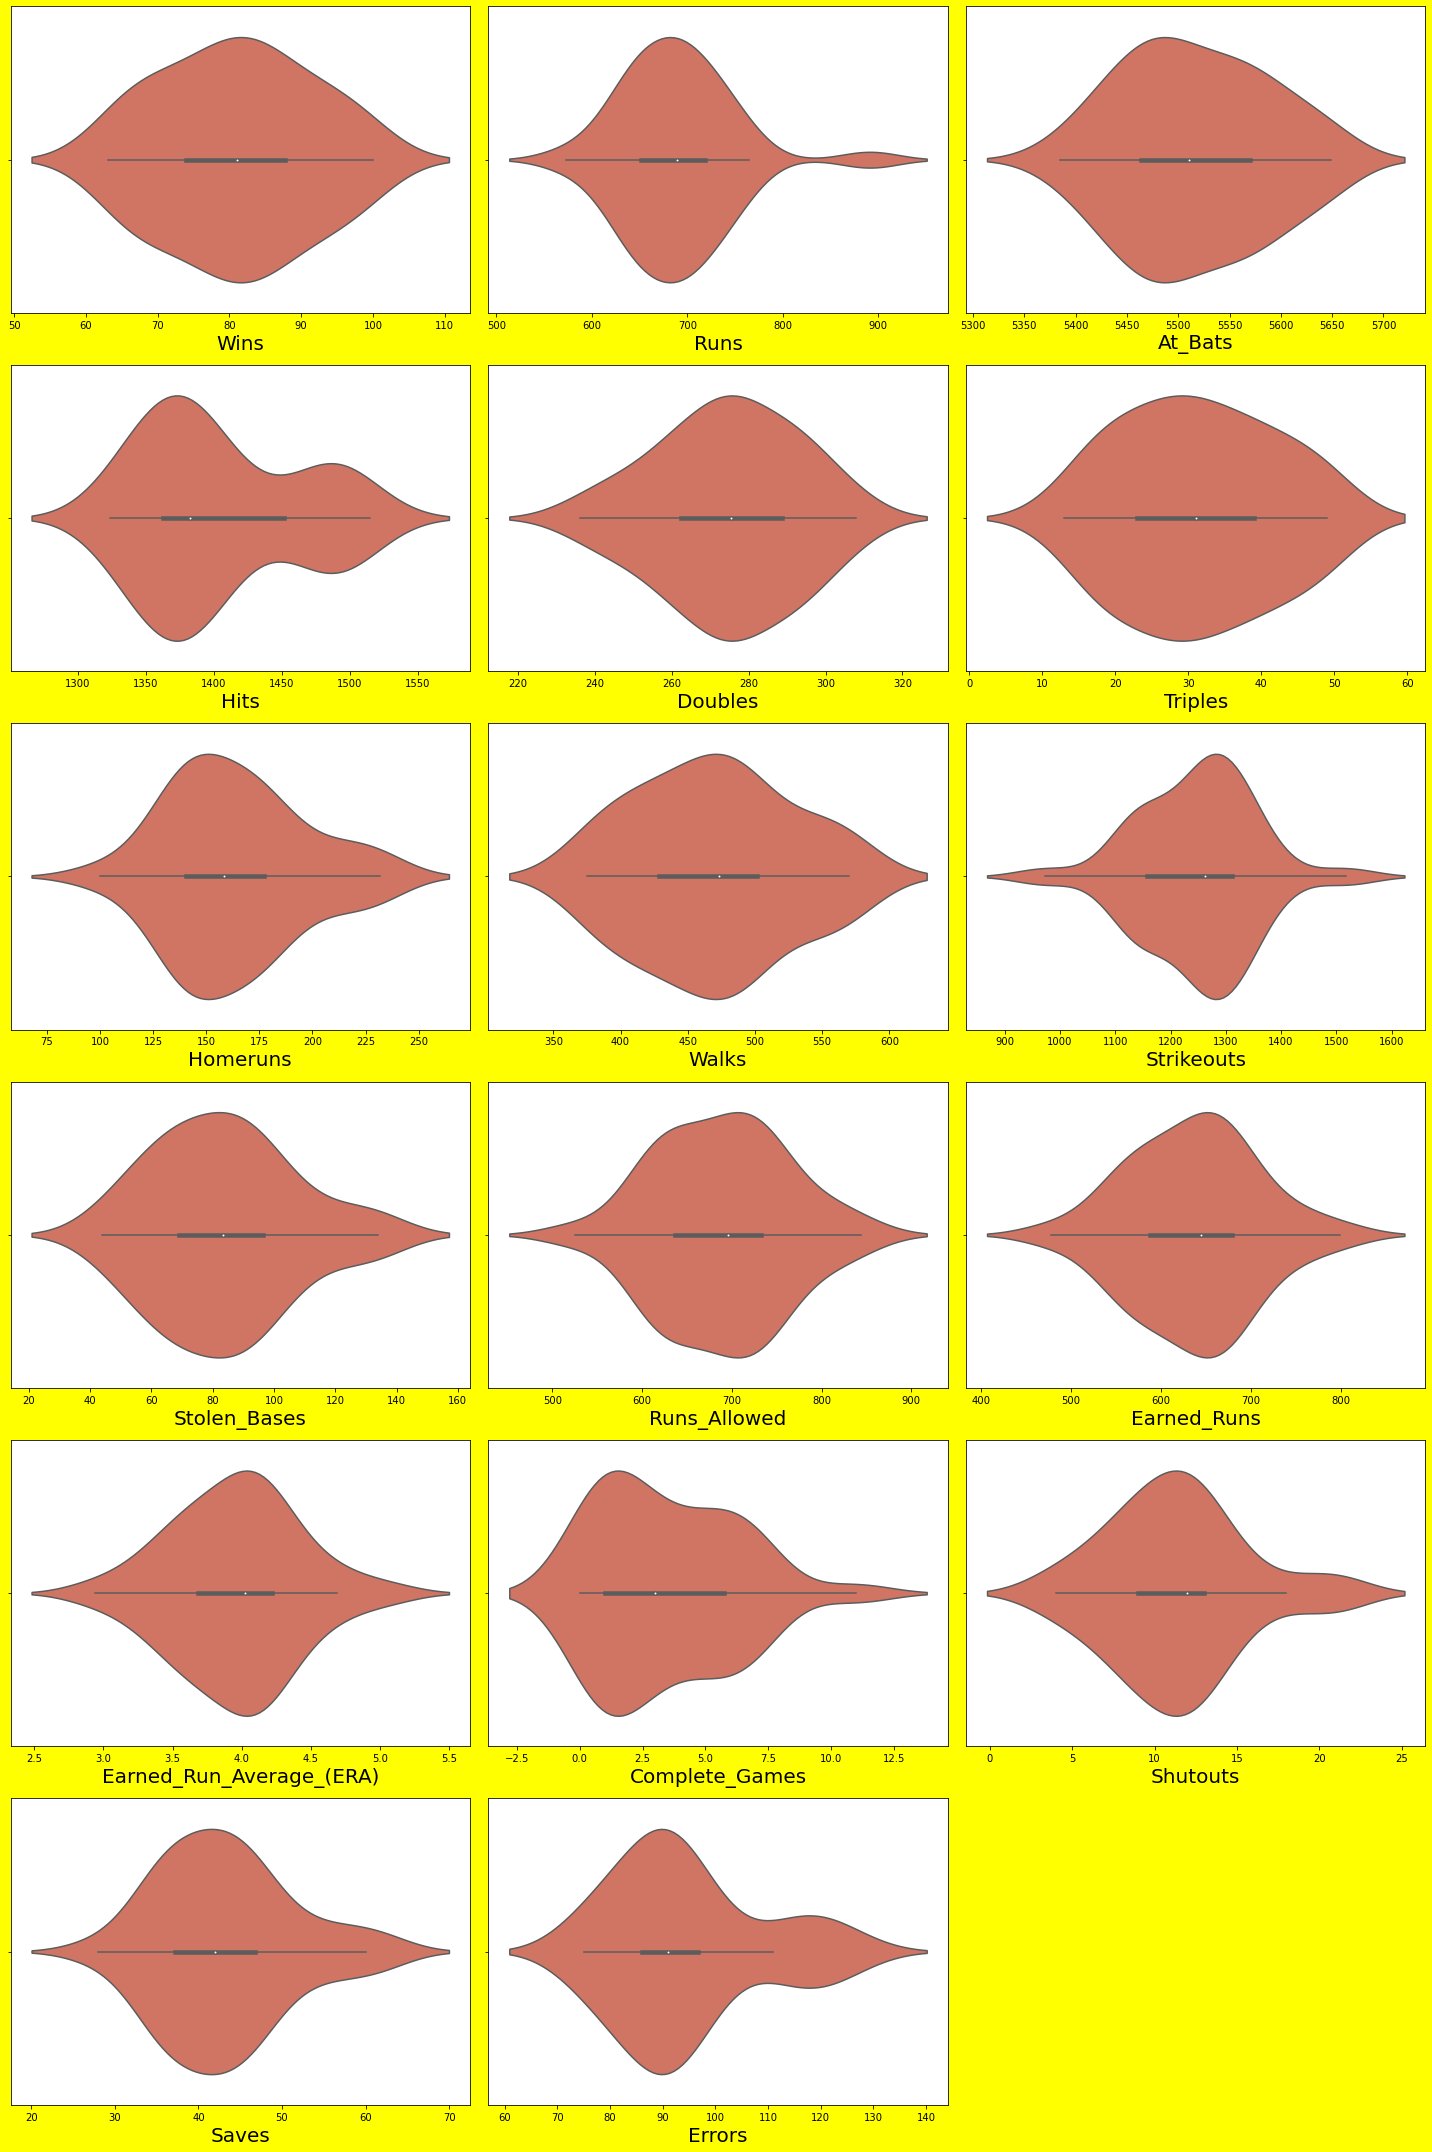

In [33]:
plt.figure(figsize=(20,30),facecolor='yellow' )
plno=1
for x in df:
    if plno<=17:
        plt.subplot(6,3,plno)
        sns.violinplot(df[x])
        plt.xlabel (x, fontsize= 20)
    plno +=1
plt.tight_layout()

In [34]:
# Observations:

# All of the features are not normally distributed

# Looks like Runs ,Complete_Games, Shutouts, Saves, Errors are right skewed

# Looks Like Runs_Allowed, Earned_Runs and Earned_Run_Average_(ERA) are same in distribution

# Also  Shutouts and Complete_Games are same in distribution

# Most of the Runs values are in between 600 to 800

# Most of the ERA values are in between 3 to 4.5

# outliers are present in errors

In [82]:


# Here the winner is one who scored maximum runs

# Let's check the relationship between Runs with different features.

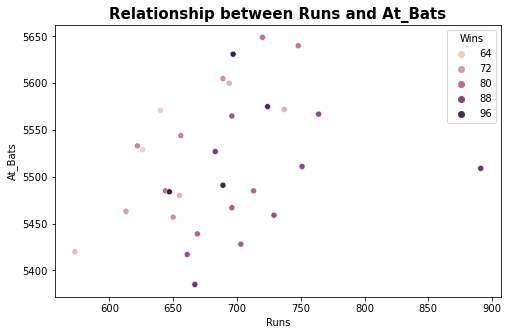

In [36]:
# Checking the relation between Runs and At_Bats

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and At_Bats',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['At_Bats'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('At_Bats')
plt.show()

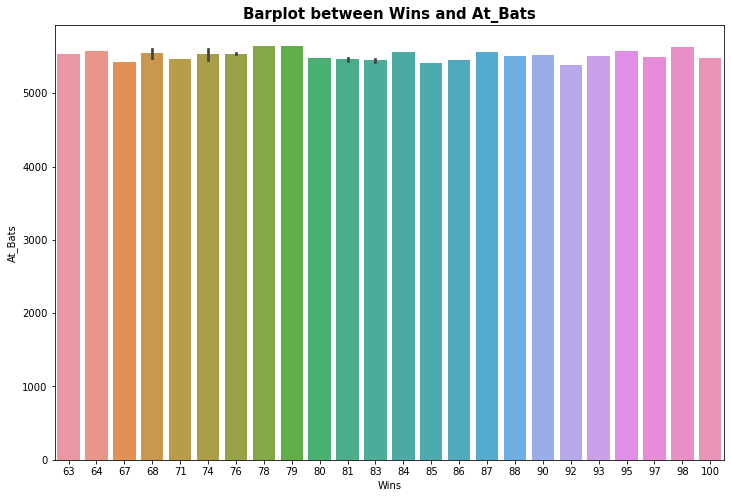

In [39]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="At_Bats", data=df)
plt.title('Barplot between Wins and At_Bats',fontsize =15, fontweight='bold')
plt.show()

In [40]:
# Observations:

# The Runs are in the range 650-750.

# One outliers is present for Runs.

# There is no specific change of At_Bats wit respect to wining rates.

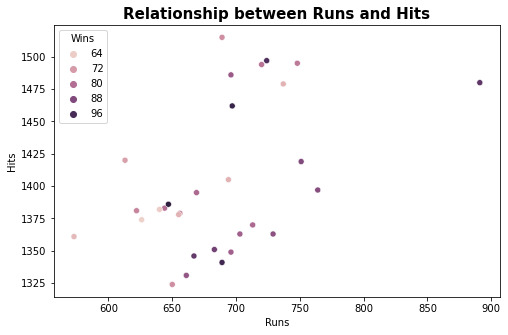

In [42]:
# Checking the relation between Runs and Hits

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Hits',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Hits'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Hits')
plt.show()

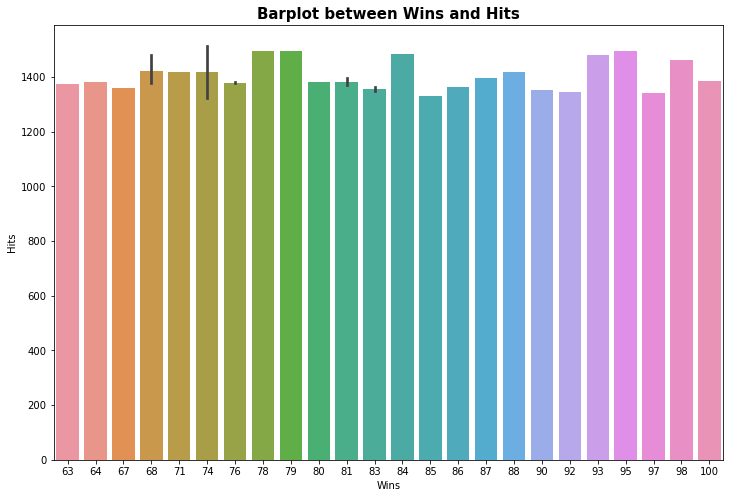

In [43]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Hits", data=df)
plt.title('Barplot between Wins and Hits',fontsize =15, fontweight='bold')
plt.show()


In [44]:
# Observations:

# Where the Hits value is less than 1400, a good wining rate is present.
# There is no such increment of wins if the Hits value is increased(> 1500)

# The wining rate is very less for Hits <1325

# The wining rate is very less for Runs <650

# Seems one outliers is present for Runs.

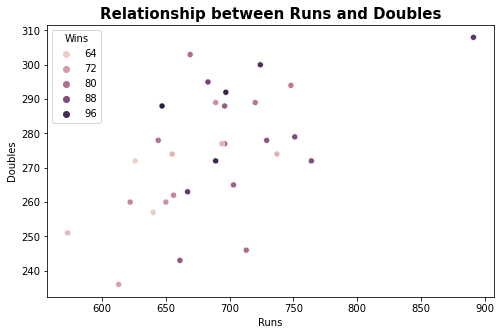

In [46]:
# Checking the relation between Runs and Doubles

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Doubles',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Doubles'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Doubles')
plt.show()

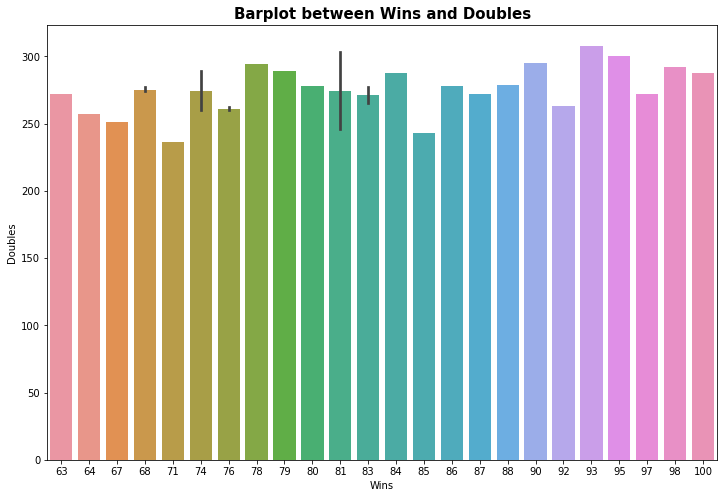

In [47]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Doubles", data=df)
plt.title('Barplot between Wins and Doubles',fontsize =15, fontweight='bold')
plt.show()


In [48]:
# Observations:

# Here if Doubles increased, wining is also increased.

# The range of Doubles is 260 - 300

# The wining rate is very low for Doubles< 260. The team needs to keep the Double score >260 for a high wining chance.

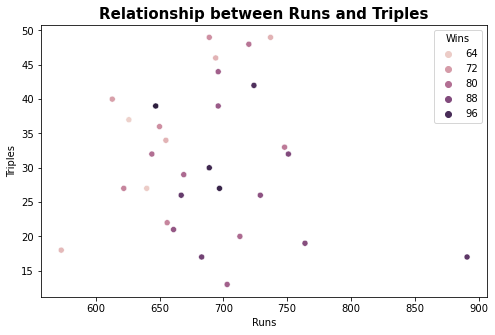

In [49]:
# Checking the relation between Runs and Triples

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Triples',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Triples'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Triples')
plt.show()

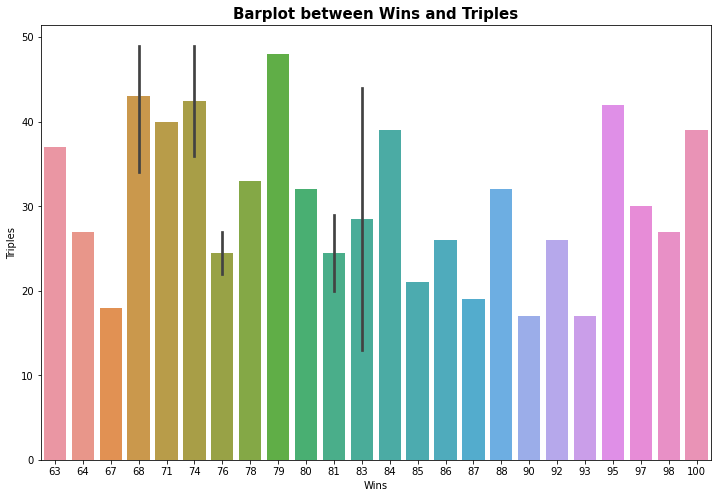

In [50]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Triples", data=df)
plt.title('Barplot between Wins and Triples',fontsize =15, fontweight='bold')
plt.show()

In [51]:
# Observations:

# There is no clear relationship between triples and Wins

# The range of Triples is 20-40


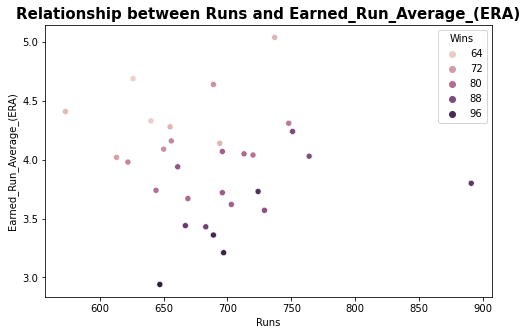

In [52]:
# Checking the relation between Runs and Earned_Run_Average_(ERA)

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Earned_Run_Average_(ERA)',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Earned_Run_Average_(ERA)'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Earned_Run_Average_(ERA)')
plt.show()

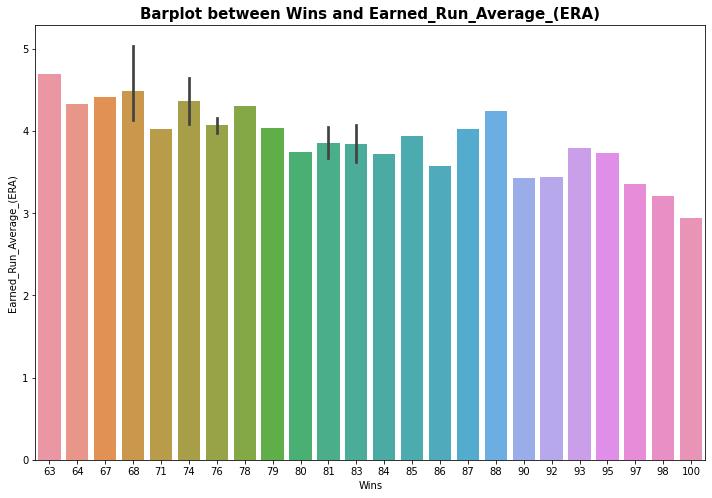

In [53]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Earned_Run_Average_(ERA)", data=df)
plt.title('Barplot between Wins and Earned_Run_Average_(ERA)',fontsize =15, fontweight='bold')
plt.show()

In [54]:
# Observations:

# If ERA is increased, Wins is also decreased.

# ERA range is in between 3.0 to 4.0 for good wining rate.

# The wining rate is very less for ERA>4.0

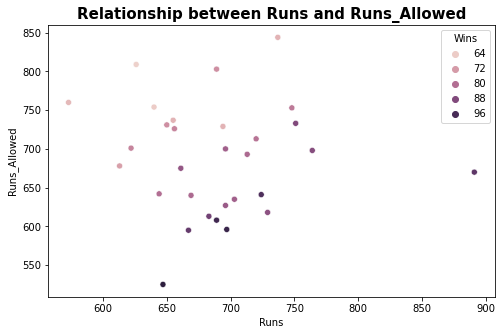

In [55]:
# Checking the relation between Runs and Runs_Allowed

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Runs_Allowed',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Runs_Allowed'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Runs_Allowed')
plt.show()


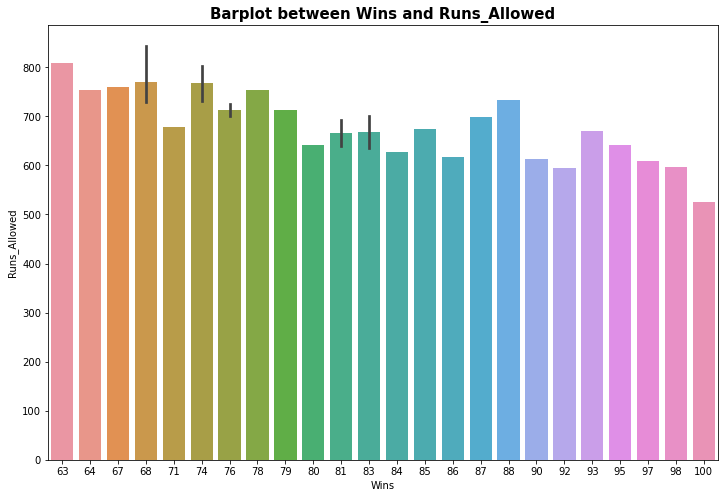

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Runs_Allowed", data=df)
plt.title('Barplot between Wins and Runs_Allowed',fontsize =15, fontweight='bold')
plt.show()


In [57]:
# Observations:

# Wining is low for Runs_Allowed <700.

# For wining in the game, the Runs_Allowed is in the range 550 to 700

# More Runs_Allowed gives advantage to hitter and the wining is low.

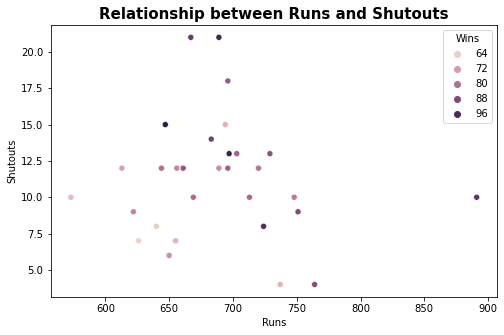

In [58]:
# Checking the relation between Runs and Shutouts

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Shutouts',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Shutouts'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Shutouts')
plt.show()

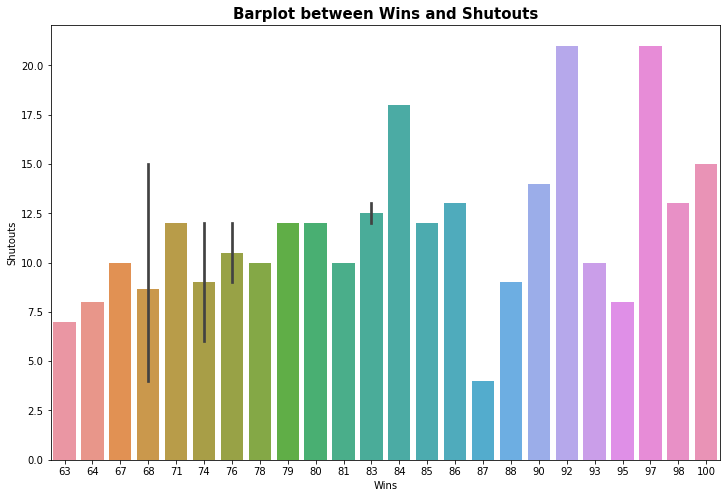

In [59]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Shutouts", data=df)
plt.title('Barplot between Wins and Shutouts',fontsize =15, fontweight='bold')
plt.show()


In [60]:
# Observations

# Wining rate is high for high saves

# Wins is very low if Shutouts < 7.5

# range of shutouts is 7.5-15.0

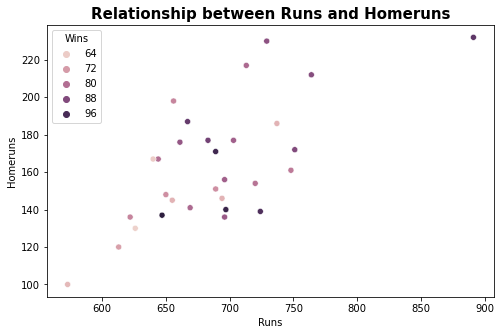

In [61]:
# Checking the relation between Runs and Homeruns

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Homeruns',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Homeruns'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Homeruns')
plt.show()

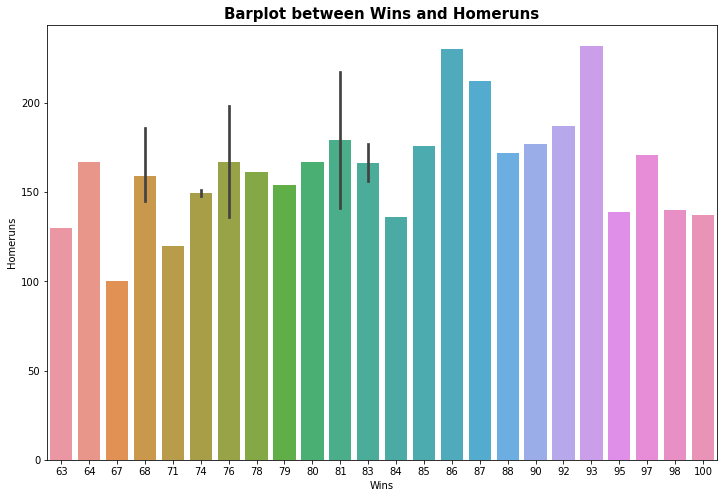

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Homeruns", data=df)
plt.title('Barplot between Wins and Homeruns',fontsize =15, fontweight='bold')
plt.show()


In [63]:
# Observations:

# The best wining rate is shown for the range 130 to 180 for Homeruns

# If Homeruns increased, the wining possibility is also increased.

# The wining is very less for Homeruns < 140

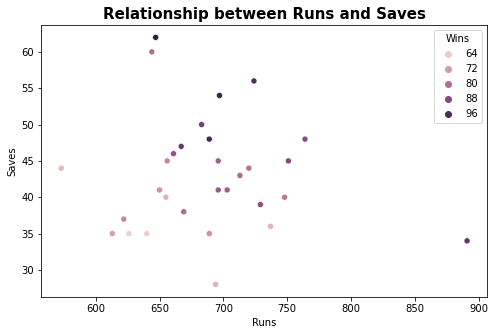

In [64]:
# Checking the relation between Runs and Saves

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Saves',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Saves'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Saves')
plt.show()


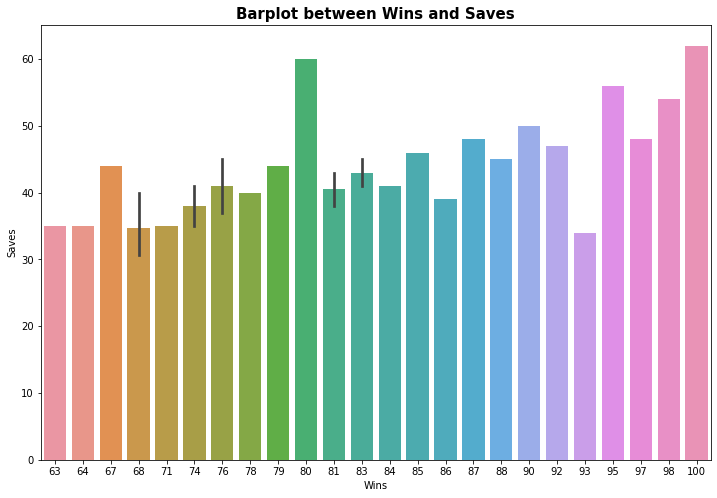

In [65]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Saves", data=df)
plt.title('Barplot between Wins and Saves',fontsize =15, fontweight='bold')
plt.show()

In [66]:
#Observations:

# Wins is high for high Saves (>45) value.

# There is very less chance for wins if the value of Saves is <40

# The range of saves is 35-55

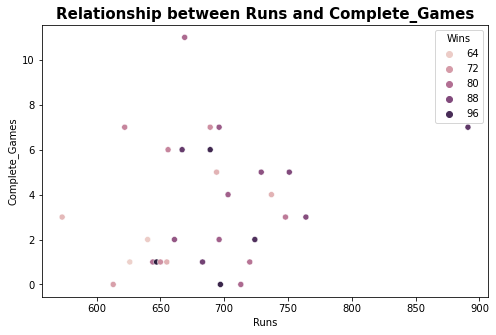

In [67]:
# Checking the relation between Runs and Complete_Games

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Complete_Games',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Complete_Games'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Complete_Games')
plt.show()

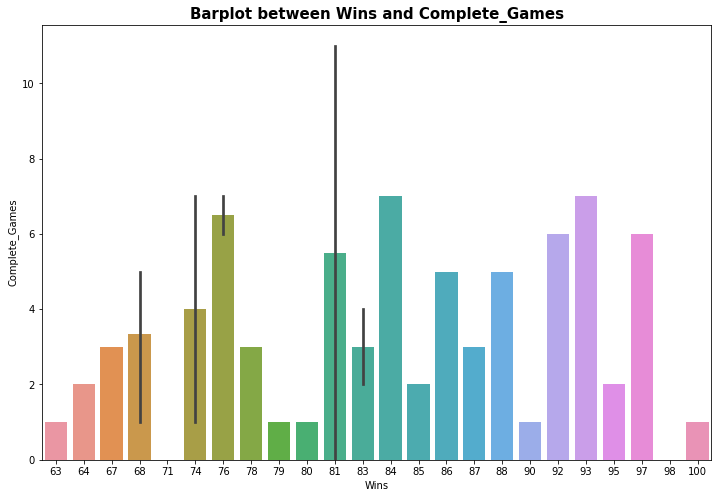

In [68]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Complete_Games", data=df)
plt.title('Barplot between Wins and Complete_Games',fontsize =15, fontweight='bold')
plt.show()

In [69]:
# Observations:

# Low wining rate have Complete_Games value <6

# It should be in the range 1-6

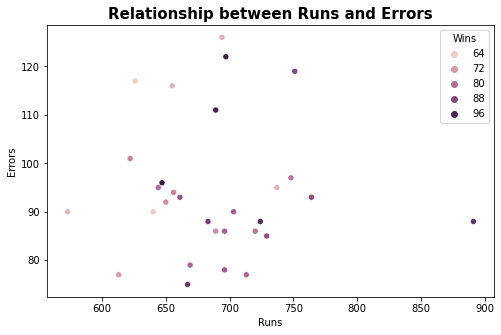

In [70]:
# Checking the relation between Runs and Errors

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Errors',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Errors'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Errors')
plt.show()

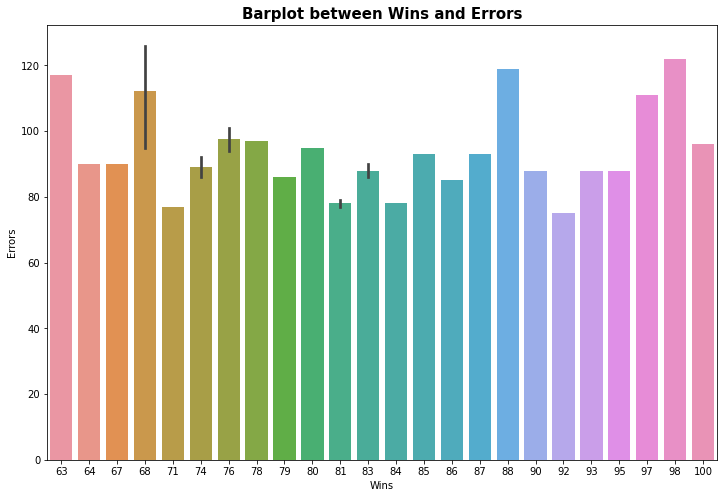

In [71]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Errors", data=df)
plt.title('Barplot between Wins and Errors',fontsize =15, fontweight='bold')
plt.show()

In [72]:
# Observations:

# For good winig rate, Error value should be low.

# The Error placed in the range 80-100.

# That would be very good if the Error is less than 90( as , the wining rate is high)

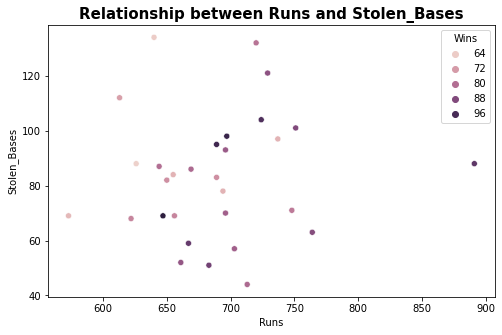

In [73]:
# Checking the relation between Runs and Stolen_Bases

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Stolen_Bases',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Stolen_Bases'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Stolen_Bases')
plt.show()

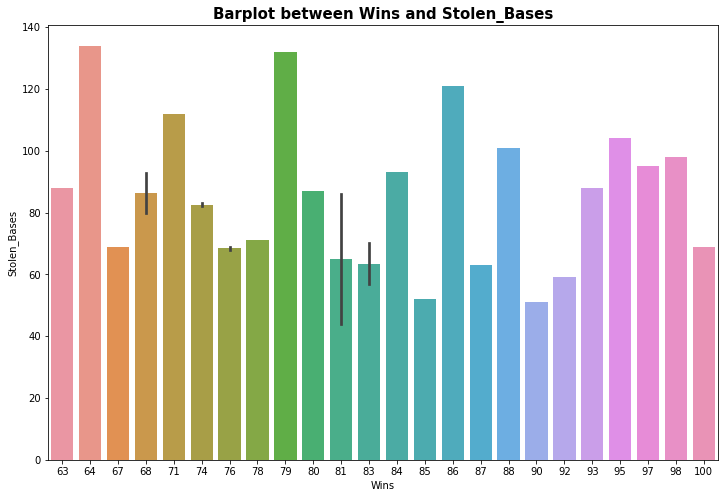

In [74]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Stolen_Bases", data=df)
plt.title('Barplot between Wins and Stolen_Bases',fontsize =15, fontweight='bold')
plt.show()


In [75]:
# Observations:

# Wins is high for Stolen_Bases<100

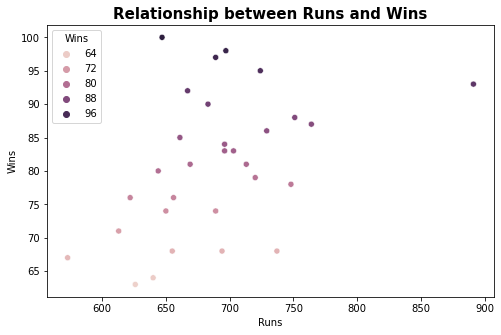

In [76]:
# Checking the relation between Runs and Stolen_Bases

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Wins',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Wins'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Wins')
plt.show()

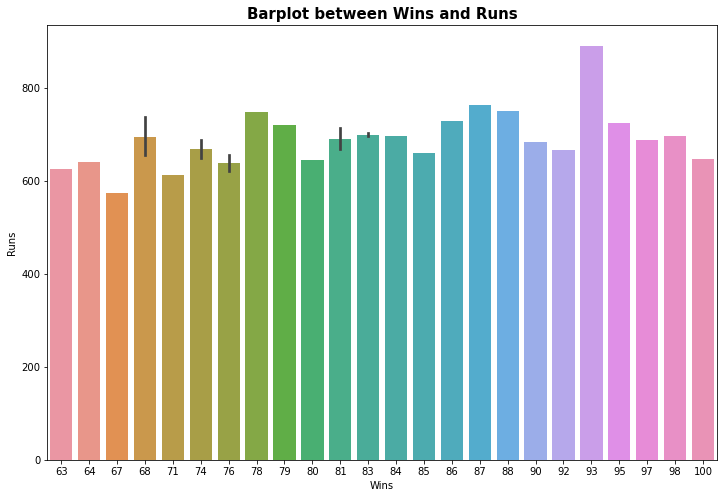

In [77]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Runs", data=df)
plt.title('Barplot between Wins and Runs',fontsize =15, fontweight='bold')
plt.show()

In [78]:
# Observations:

# For high wining possibility the Run> 600

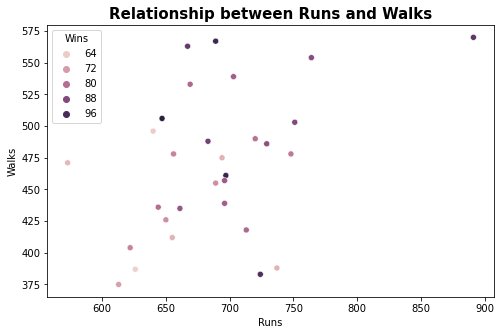

In [79]:
# Checking the relation between Runs and Walks

plt.figure(figsize=[8,5])
plt.title('Relationship between Runs and Walks',fontsize =15, fontweight='bold')
sns.scatterplot(df['Runs'],df['Walks'],hue=df['Wins'])
plt.xlabel('Runs')
plt.ylabel('Walks')
plt.show()

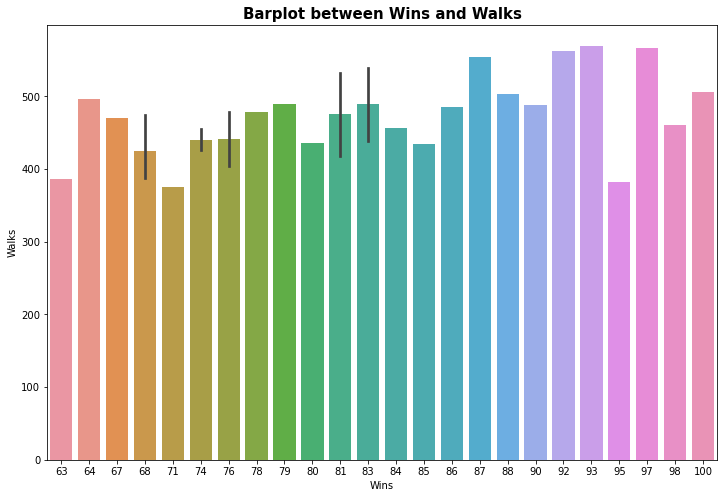

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(x="Wins", y="Walks", data=df)
plt.title('Barplot between Wins and Walks',fontsize =15, fontweight='bold')
plt.show()

In [81]:
# Observations:

# Walks> 400 is the higher probability in Wins.

# Range of Walks in between 400 -500

# Lets check the relationship between Lables(Wins) with different features.

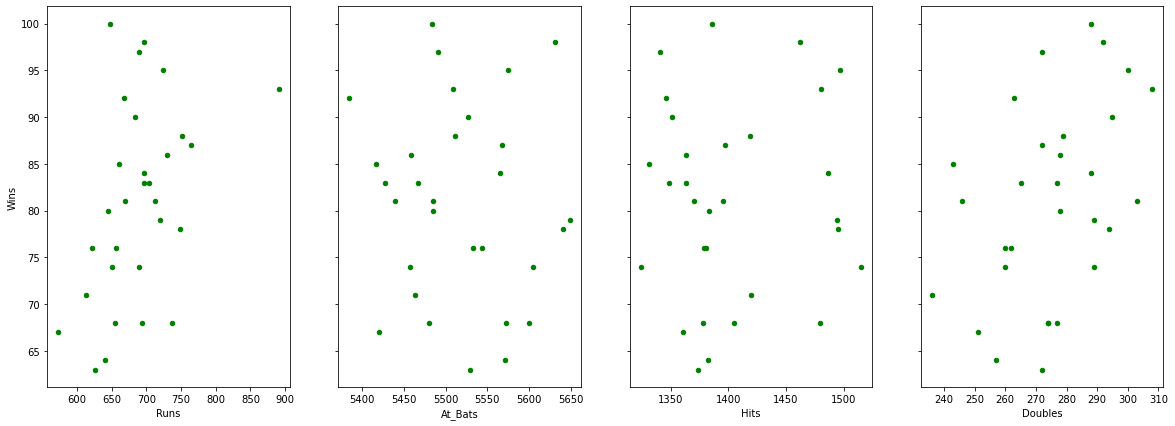

In [83]:
fig, axs =plt.subplots(1,4,sharey=True)
df.plot(kind='scatter', x='Runs', y='Wins', ax=axs[0], figsize=(20,7),color ='g')
df.plot(kind='scatter', x='At_Bats', y='Wins', ax=axs[1],color ='g')
df.plot(kind='scatter', x='Hits', y='Wins', ax=axs[2],color ='g')
df.plot(kind='scatter', x='Doubles', y='Wins', ax=axs[3],color ='g')
plt.show()

In [84]:
# Observations:

# Most of the Runs are in range 600-750

# No clear relationship is present between At_Bats, Hits and Doubles with Wins

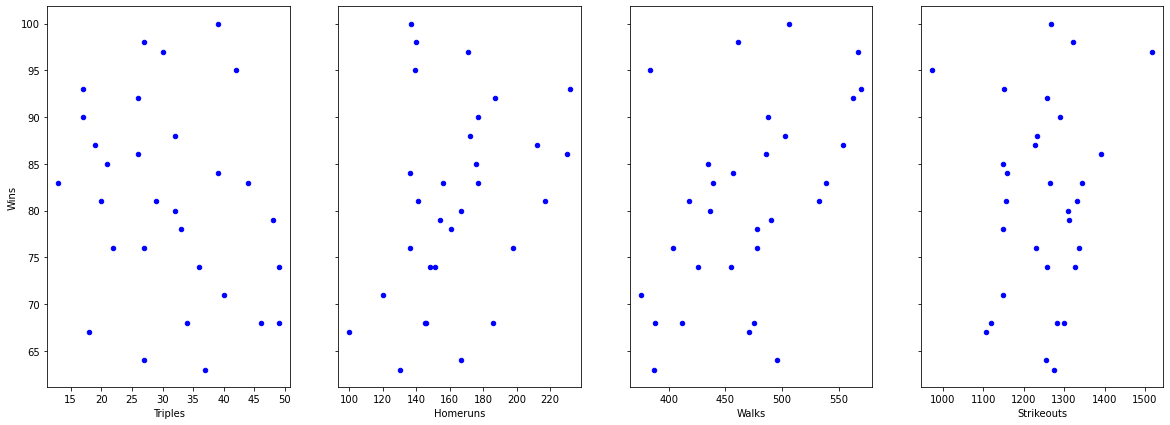

In [85]:
fig, axs =plt.subplots(1,4,sharey=True)
df.plot(kind='scatter', x='Triples', y='Wins', ax=axs[0], figsize=(20,7),color ='b')
df.plot(kind='scatter', x='Homeruns', y='Wins', ax=axs[1],color ='b')
df.plot(kind='scatter', x='Walks', y='Wins', ax=axs[2],color ='b')
df.plot(kind='scatter', x='Strikeouts', y='Wins', ax=axs[3],color ='b')
plt.show()

In [86]:
# Observations:

# Most of the Strikeouts are in range 1100-1400

# Wins is slightly increased with the increment of Homeruns and Walks

# All the 4 graphs are very scattered with respect to pattern

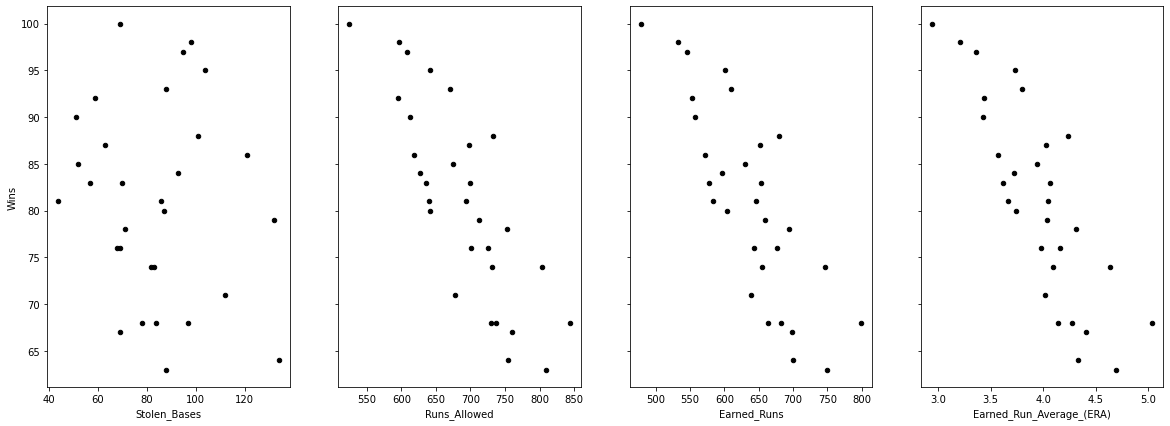

In [87]:
fig, axs =plt.subplots(1,4,sharey=True)
df.plot(kind='scatter', x='Stolen_Bases', y='Wins', ax=axs[0], figsize=(20,7),color ='black')
df.plot(kind='scatter', x='Runs_Allowed', y='Wins', ax=axs[1],color ='black')
df.plot(kind='scatter', x='Earned_Runs', y='Wins', ax=axs[2],color ='black')
df.plot(kind='scatter', x='Earned_Run_Average_(ERA)', y='Wins', ax=axs[3],color ='black')
plt.show()

In [88]:
# Observations:

# Stolen_Bases and Wins has no clear relation.

# Wins is high for low Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA)

# The relationship of Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA) looks similar with Wins.

# Seems this 3 features are correlated.

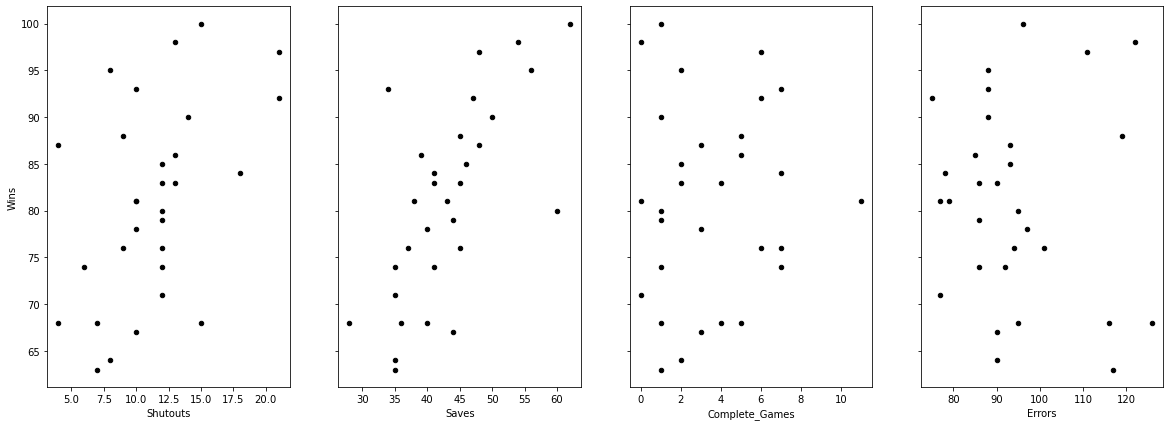

In [89]:
fig, axs =plt.subplots(1,4,sharey=True)
df.plot(kind='scatter', x='Shutouts', y='Wins', ax=axs[0], figsize=(20,7),color ='black')
df.plot(kind='scatter', x='Saves', y='Wins', ax=axs[1],color ='black')
df.plot(kind='scatter', x='Complete_Games', y='Wins', ax=axs[2],color ='black')
df.plot(kind='scatter', x='Errors', y='Wins', ax=axs[3],color ='black')
plt.show()

In [90]:
# Observations:

# Wins has no clear relation with Complete_Games and Errors.

# Looks like Saves are directly proportional with wins i.e. there may be some positive relationship.

# Shutouts and Errors are very scattered with respect to pattern.

In [91]:
# Further Graphical Analysis:

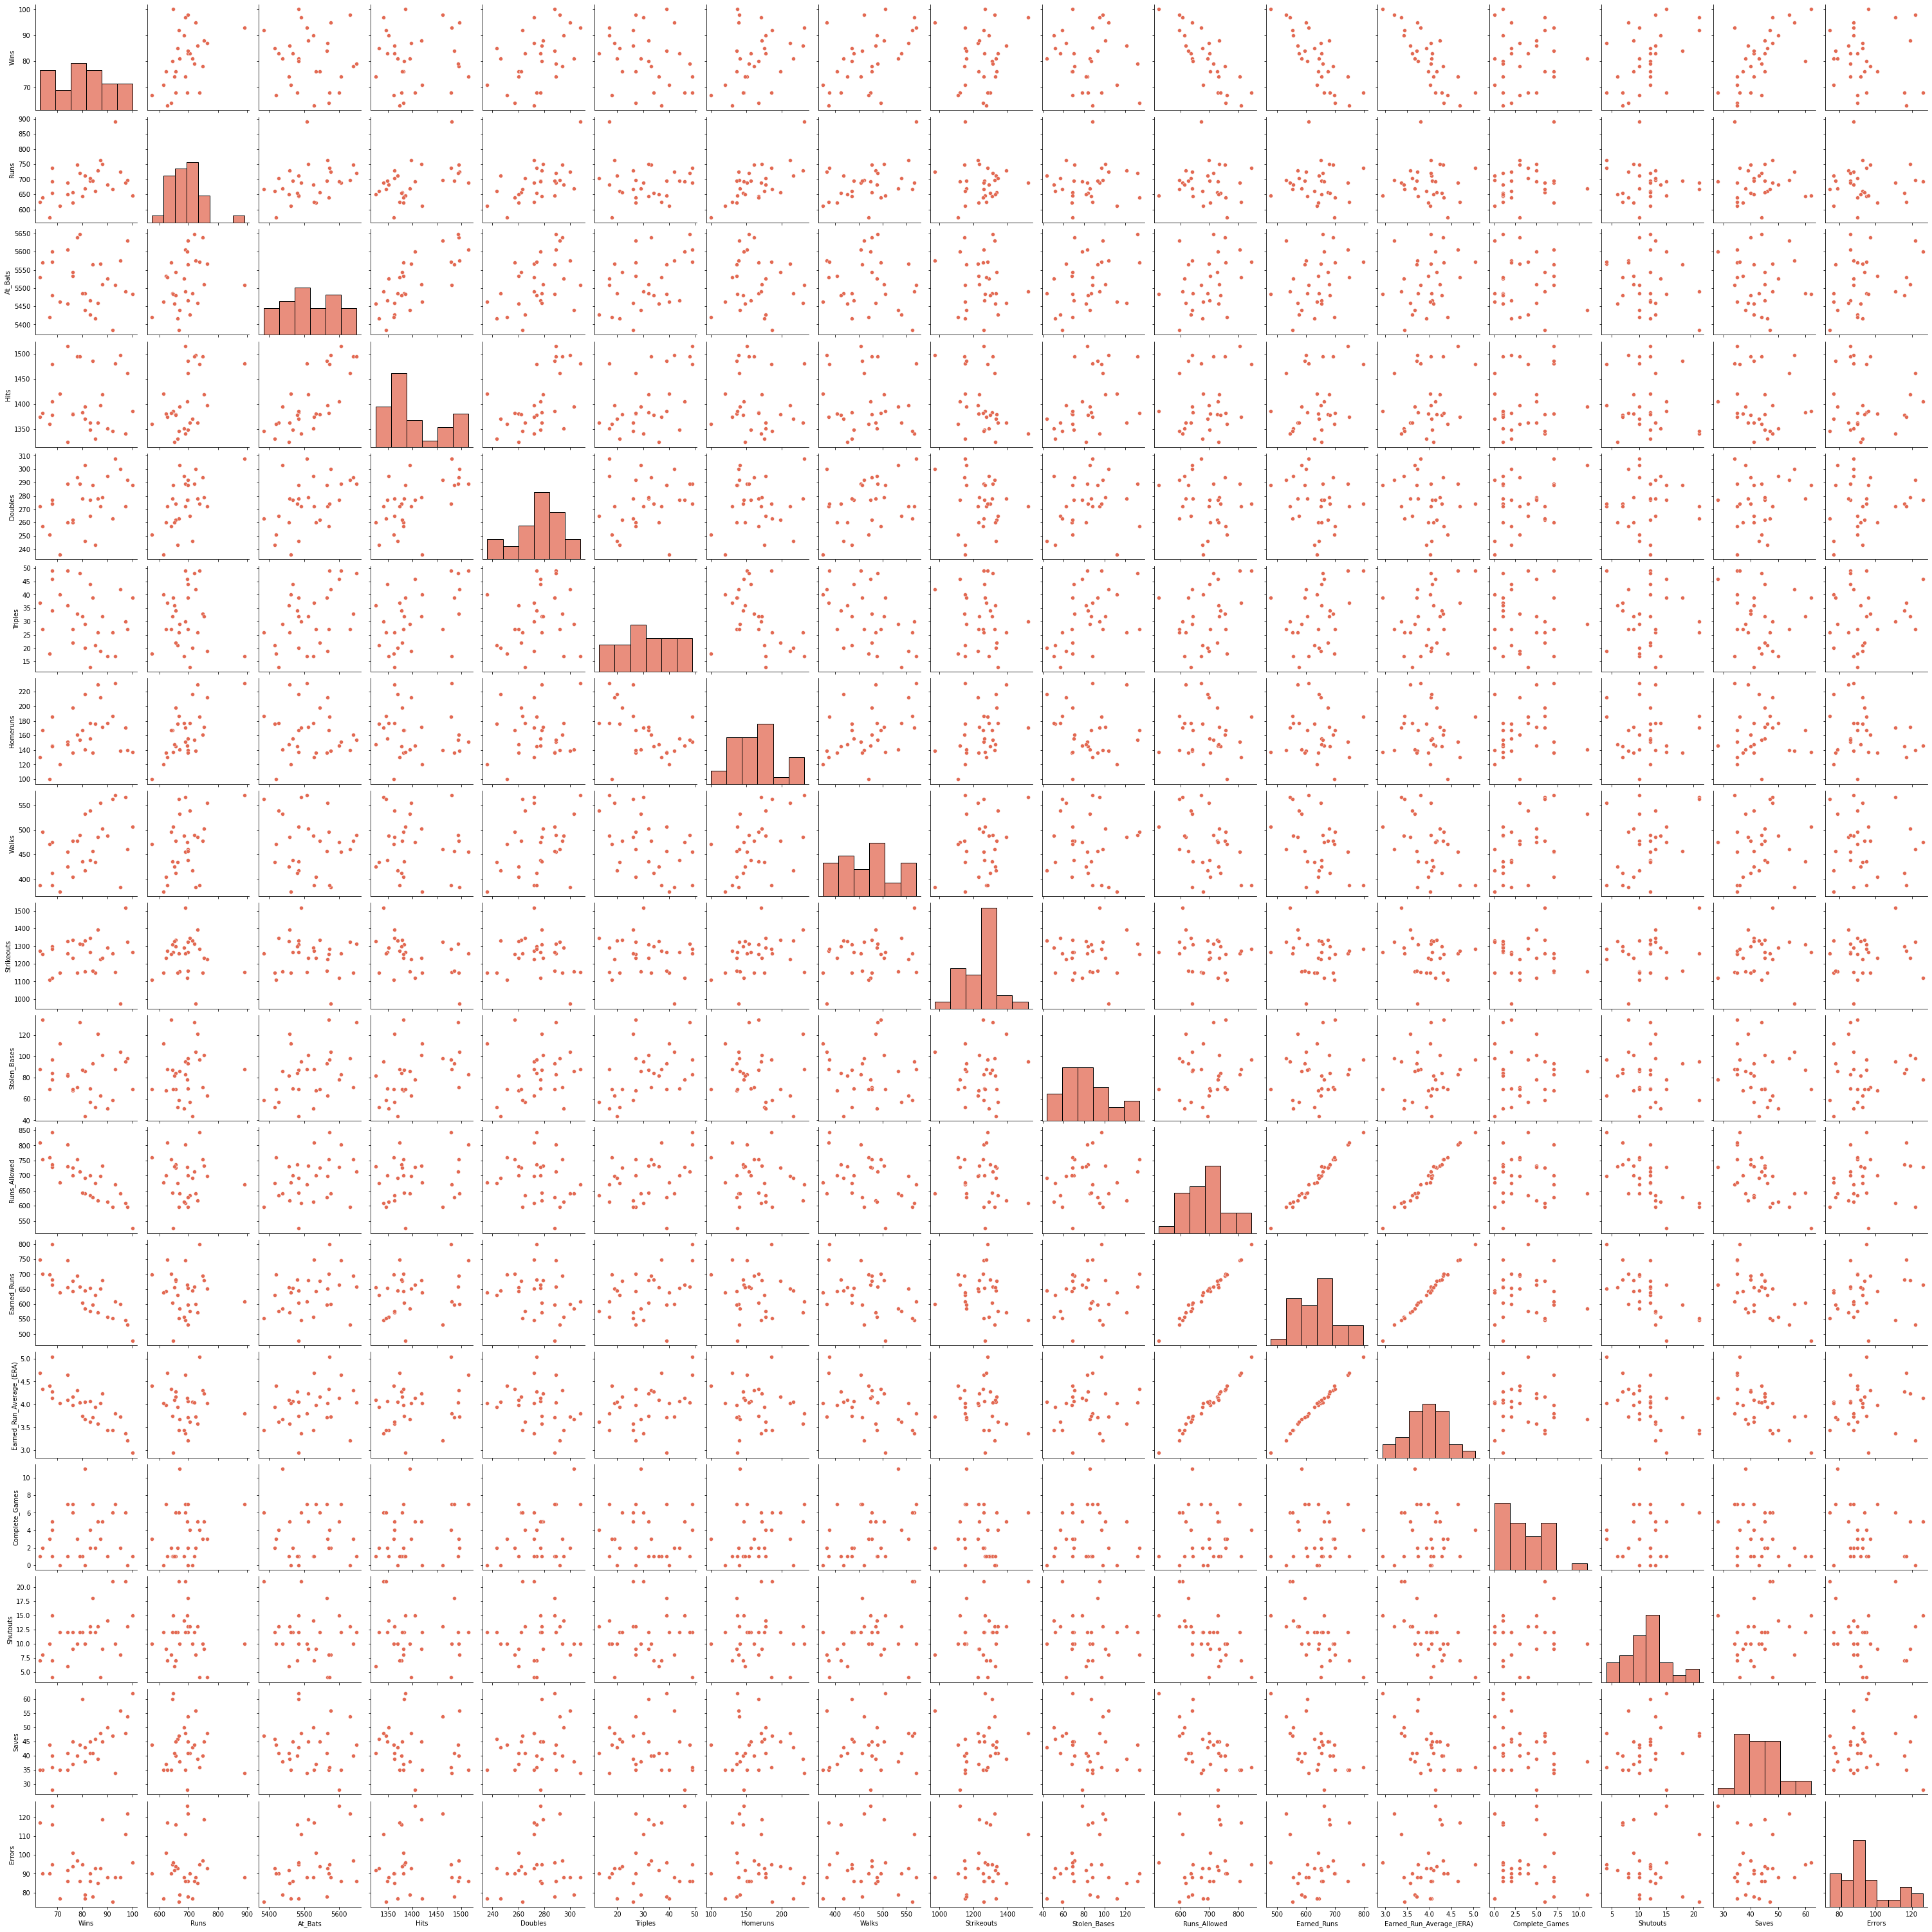

In [93]:
sns.pairplot(df)
plt.show()

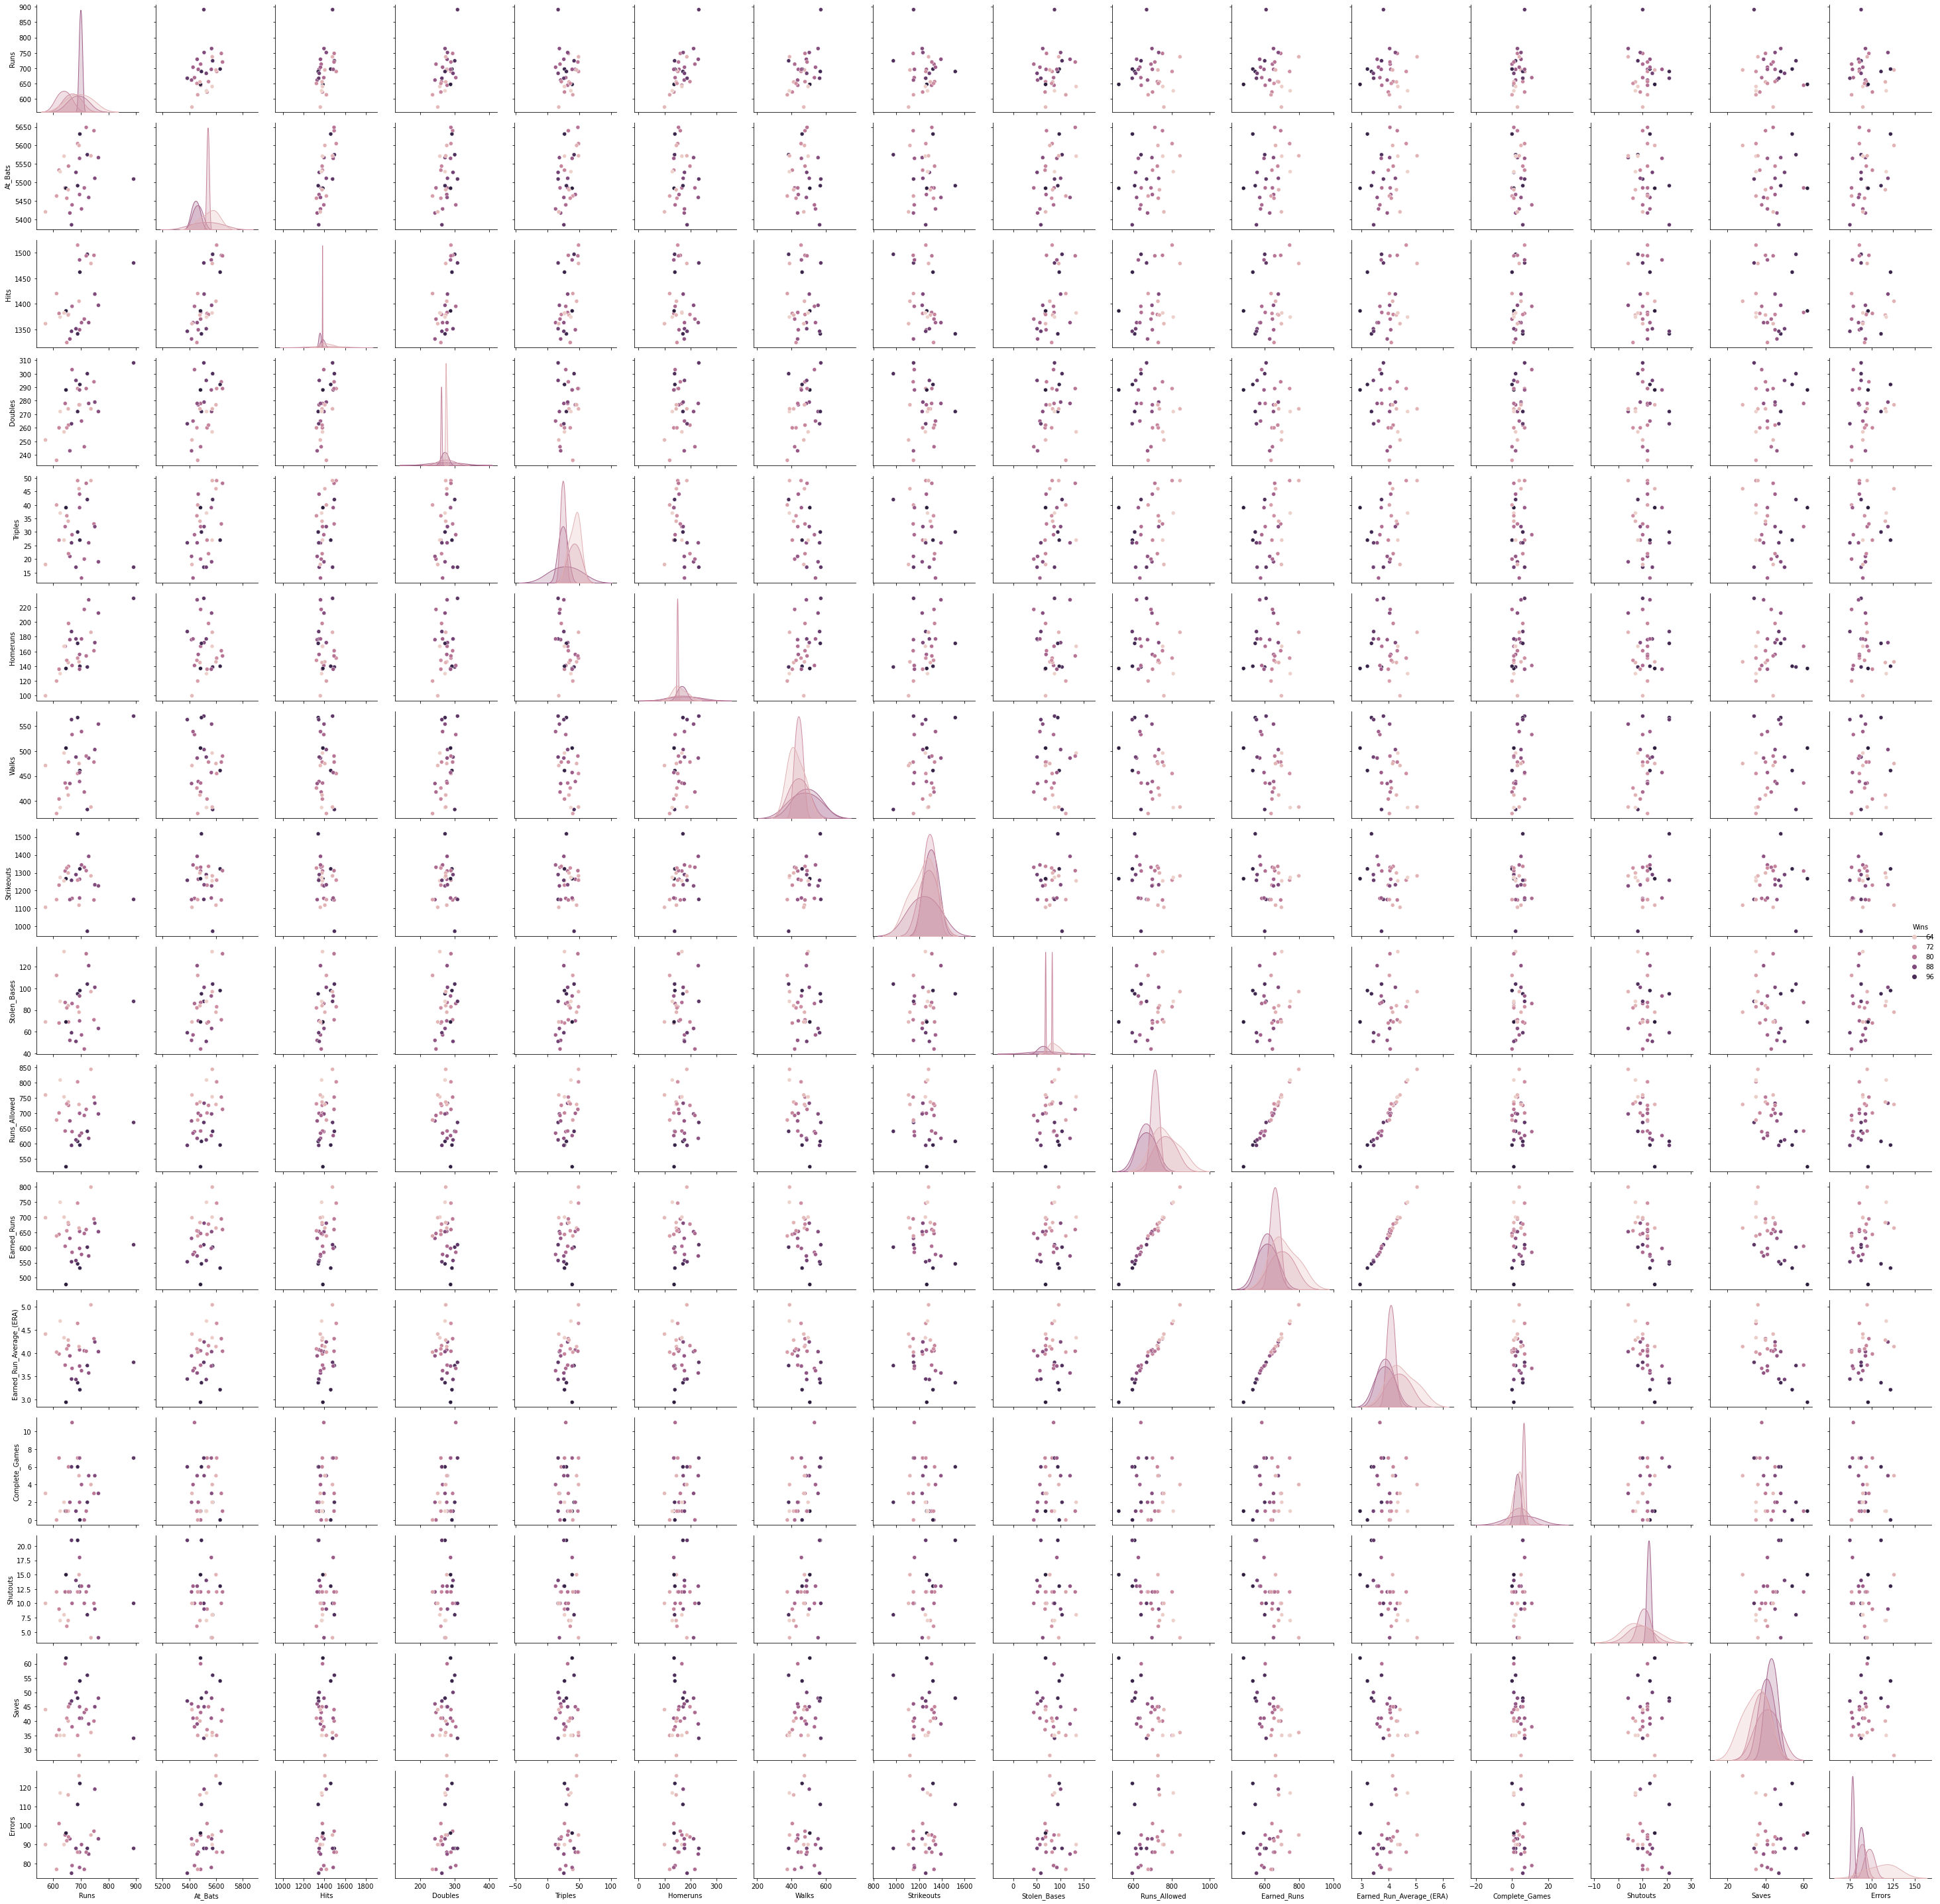

In [94]:
sns.pairplot(df, hue= "Wins", kind= 'scatter')
plt.tight_layout()
plt.show()

In [95]:
# Observations:

# Here seems 'Runs_Allowed', 'Earned_Runs' and 'Earned_Run_Average_(ERA)' are correlated.

# Some of the features have outliers.

# Most of the features are in scattred way.

In [96]:
# Let's check the relationship between 'Runs_Allowed', 'Earned_Runs' and 'Earned_Run_Average_(ERA)' 
# Seems they are in some correlation(positive/ negetive)

# Let us do some more graphical digging


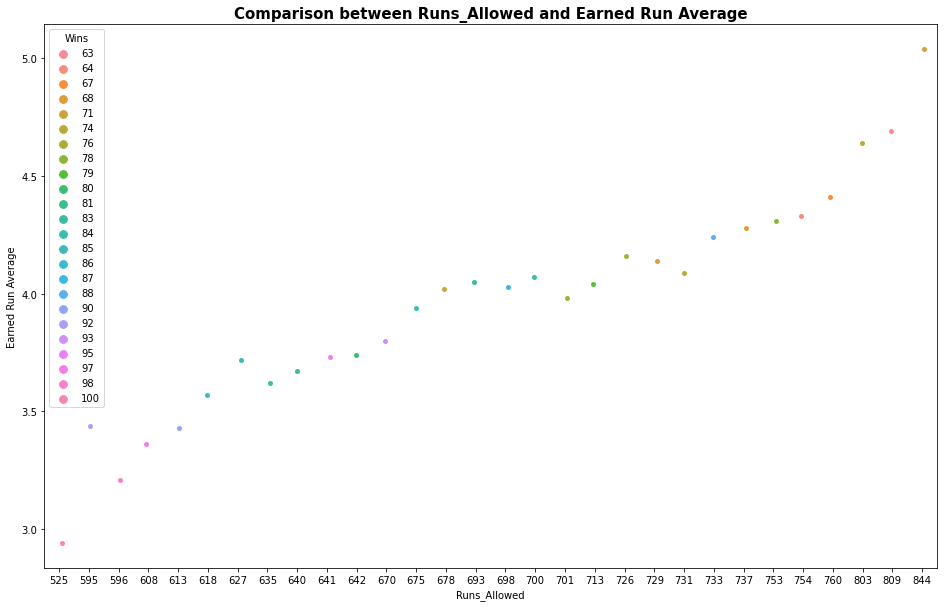

In [97]:
# Checking the relation between Earned_Run_Average_(ERA) and Runs_Allowed

plt.figure(figsize=[16,10])
plt.title('Comparison between Runs_Allowed and Earned Run Average',fontsize =15, fontweight='bold')
sns.stripplot(df['Runs_Allowed'],df['Earned_Run_Average_(ERA)'],hue=df['Wins'])
plt.xlabel('Runs_Allowed')
plt.ylabel('Earned Run Average')
plt.show()


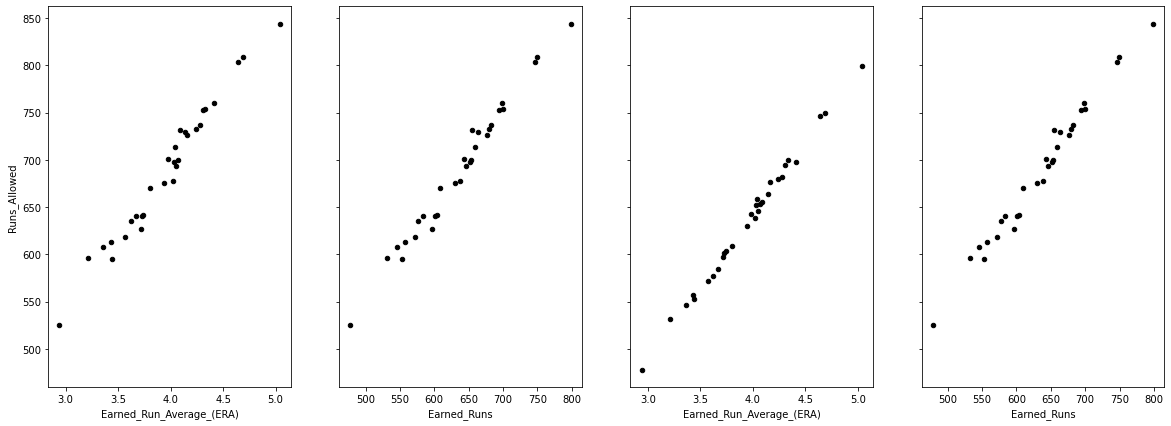

In [98]:
fig, axs =plt.subplots(1,4,sharey=True)
df.plot(kind='scatter', x='Earned_Run_Average_(ERA)', y='Runs_Allowed', ax=axs[0], figsize=(20,7),color ='black',)
df.plot(kind='scatter', x='Earned_Runs', y='Runs_Allowed', ax=axs[1],color ='black')
df.plot(kind='scatter', x='Earned_Run_Average_(ERA)', y='Earned_Runs', ax=axs[2],color ='black')
df.plot(kind='scatter', x='Earned_Runs', y='Runs_Allowed', ax=axs[3],color ='black')
plt.show()

In [99]:
# Observations:

# Runs_Allowed, and Earned_Run_Average_(ERA) hold linear relationship.

# Earned_Runs and Runs_Allowed hold linear relationship

# Earned_Run_Average_(ERA) and Earned_Runs hold linear relationship

# Earned_Runs and Runs_Allowed hold linear relationship.

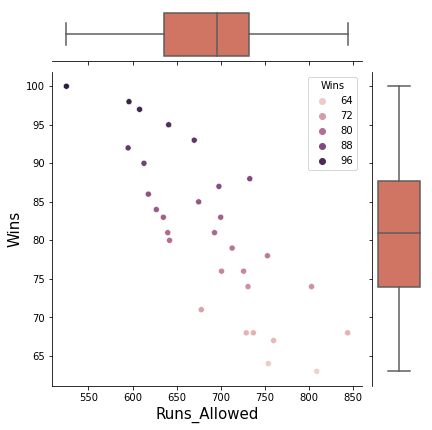

In [101]:
ax= sns.JointGrid(x="Runs_Allowed", y= "Wins", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='Runs_Allowed', ylabel='Wins', fontsize=15)
plt.show()

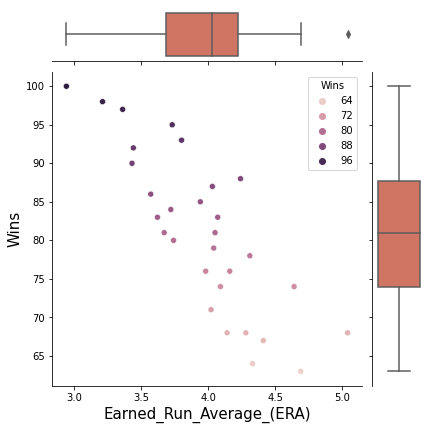

In [102]:
ax= sns.JointGrid(x="Earned_Run_Average_(ERA)", y= "Wins", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.boxplot)
ax.set_axis_labels(xlabel='Earned_Run_Average_(ERA)', ylabel='Wins', fontsize=15)
plt.show()

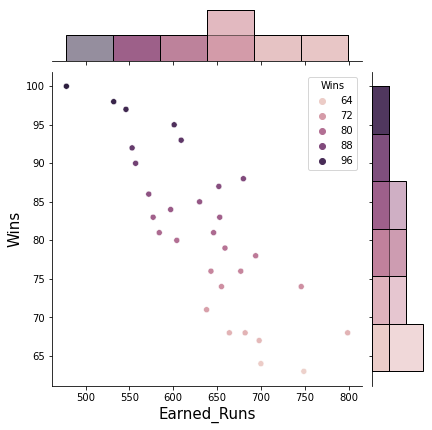

In [103]:
ax= sns.JointGrid(x="Earned_Runs", y= "Wins", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Earned_Runs', ylabel='Wins', fontsize=15)
plt.show()

In [104]:
# Observations:

# Runs_Allowed and Wins have negetive relationship i.e. they are inversely proportional.

# Earned_Runs and Wins have negetive relationship i.e. they are inversely proportional.

# Earned_Run_Average_(ERA) and Wins have negetive relationship i.e. they are inversely proportional.

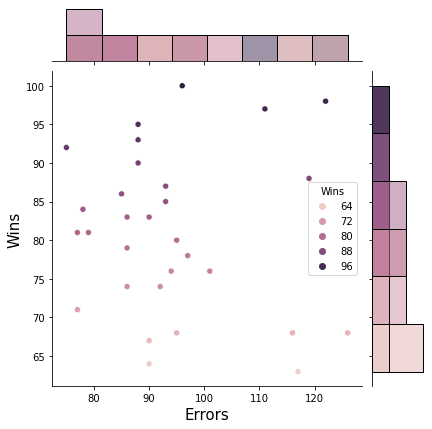

In [105]:
ax= sns.JointGrid(x="Errors", y= "Wins", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Errors', ylabel='Wins', fontsize=15)
plt.show()


In [106]:
# Observations:

# Again it is seen that, there are some outliers and if the range of error is in between 80-100.

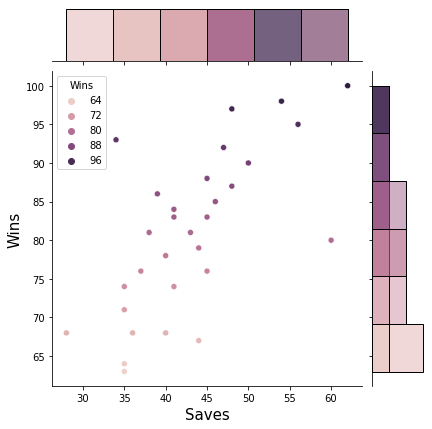

In [107]:
ax= sns.JointGrid(x="Saves", y= "Wins", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Saves', ylabel='Wins', fontsize=15)
plt.show()

In [108]:
# Observations:

# Here if saves increases the number of wins also increased.

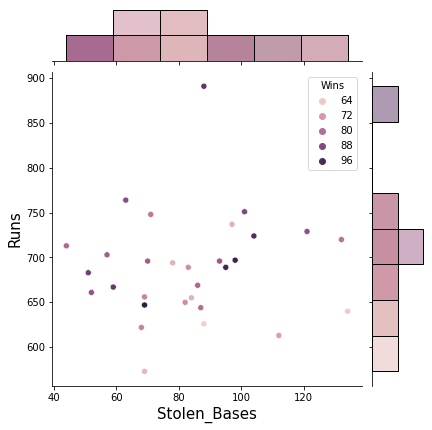

In [109]:
ax= sns.JointGrid(x="Stolen_Bases", y= "Runs", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Stolen_Bases', ylabel='Runs', fontsize=15)
plt.show()

In [110]:
# Observations:

# No clear relation is present between stolen_bases and runs

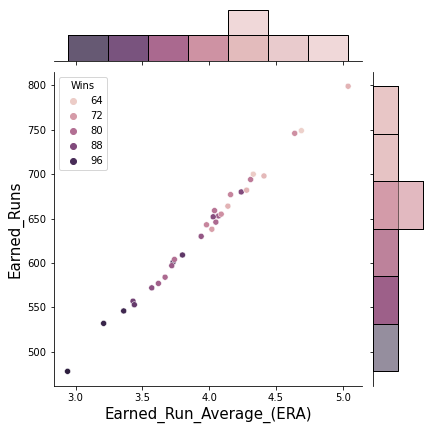

In [111]:
ax= sns.JointGrid(x="Earned_Run_Average_(ERA)", y= "Earned_Runs", hue= "Wins", data= df)
ax.plot(sns.scatterplot, sns.histplot)
ax.set_axis_labels(xlabel='Earned_Run_Average_(ERA)', ylabel='Earned_Runs', fontsize=15)
plt.show()

In [112]:
# Observations:

# It is clearly seen that, Earned_Run_Average_(ERA) and Earned_Runs have positive correlation.

# Its also conclude that Wins are inversely proportional with Earned_Run_Average_(ERA) and Earned_Runs 
#  ie. they have very strong negetive correlation with wins.


# Correlation:

In [113]:
df.corr()

Wins      Runs   At_Bats      Hits   Doubles  \
Wins                      1.000000  0.430751 -0.087947  0.037612  0.427797   
Runs                      0.430751  1.000000  0.319464  0.482856  0.560084   
At_Bats                  -0.087947  0.319464  1.000000  0.739122  0.453370   
Hits                      0.037612  0.482856  0.739122  1.000000  0.566847   
Doubles                   0.427797  0.560084  0.453370  0.566847  1.000000   
Triples                  -0.251118 -0.070072  0.435422  0.478694  0.220490   
Homeruns                  0.307407  0.671283 -0.066983 -0.090855  0.056292   
Walks                     0.484342  0.402452 -0.136414 -0.118281  0.302700   
Strikeouts                0.111850 -0.054726 -0.106022 -0.398830 -0.150752   
Stolen_Bases             -0.157234  0.081367  0.372618  0.413444  0.195027   
Runs_Allowed             -0.812952 -0.041623  0.316010  0.224324 -0.218160   
Earned_Runs              -0.809435 -0.041245  0.309686  0.252489 -0.235531   
Earned_Run_Average_(ERA) -0.819600 -0.049281  0.255551  0.231172 -0.254854   
Complete_Games            0.080533  0.232042 -0.080876  0.147955  0.306675   
Shutouts                  0.471805 -0.103274 -0.197321 -0.145559  0.057998   
Saves                     0.666530 -0.096380 -0.106367 -0.130371  0.171576   
Errors                   -0.089485 -0.023262  0.316743 -0.033173  0.105754   

                           Triples  Homeruns     Walks  Strikeouts  \
Wins                     -0.251118  0.307407  0.484342    0.111850   
Runs                     -0.070072  0.671283  0.402452   -0.054726   
At_Bats                   0.435422 -0.066983 -0.136414   -0.106022   
Hits                      0.478694 -0.090855 -0.118281   -0.398830   
Doubles                   0.220490  0.056292  0.302700   -0.150752   
Triples                   1.000000 -0.430915 -0.454949   -0.141196   
Homeruns                 -0.430915  1.000000  0.425691    0.359923   
Walks                    -0.454949  0.425691  1.000000    0.233652   
Strikeouts               -0.141196  0.359923  0.233652    1.000000   
Stolen_Bases              0.457437 -0.136567 -0.098347    0.030968   
Runs_Allowed              0.314125 -0.103903 -0.416445   -0.129745   
Earned_Runs               0.340225 -0.085922 -0.452663   -0.161612   
Earned_Run_Average_(ERA)  0.330951 -0.090917 -0.459832   -0.180368   
Complete_Games           -0.065898  0.156502  0.462478   -0.093418   
Shutouts                 -0.041396 -0.019119  0.426004    0.237721   
Saves                    -0.142370 -0.028540  0.099445    0.126297   
Errors                    0.126678 -0.207597 -0.075685    0.155133   

                          Stolen_Bases  Runs_Allowed  Earned_Runs  \
Wins                         -0.157234     -0.812952    -0.809435   
Runs                          0.081367     -0.041623    -0.041245   
At_Bats                       0.372618      0.316010     0.309686   
Hits                          0.413444      0.224324     0.252489   
Doubles                       0.195027     -0.218160    -0.235531   
Triples                       0.457437      0.314125     0.340225   
Homeruns                     -0.136567     -0.103903    -0.085922   
Walks                        -0.098347     -0.416445    -0.452663   
Strikeouts                    0.030968     -0.129745    -0.161612   
Stolen_Bases                  1.000000      0.132290     0.143068   
Runs_Allowed                  0.132290      1.000000     0.991018   
Earned_Runs                   0.143068      0.991018     1.000000   
Earned_Run_Average_(ERA)      0.126063      0.986674     0.997248   
Complete_Games               -0.020783     -0.016659    -0.020221   
Shutouts                     -0.106563     -0.636862    -0.630192   
Saves                        -0.183418     -0.616224    -0.589663   
Errors                        0.079149      0.198996     0.136921   

                          Earned_Run_Average_(ERA)  Complete_Games  Shutouts  \
Wins                                     

In [114]:
a= df.corr()['Wins'].drop(['Wins'])
a

Runs                        0.430751
At_Bats                    -0.087947
Hits                        0.037612
Doubles                     0.427797
Triples                    -0.251118
Homeruns                    0.307407
Walks                       0.484342
Strikeouts                  0.111850
Stolen_Bases               -0.157234
Runs_Allowed               -0.812952
Earned_Runs                -0.809435
Earned_Run_Average_(ERA)   -0.819600
Complete_Games              0.080533
Shutouts                    0.471805
Saves                       0.666530
Errors                     -0.089485
Name: Wins, dtype: float64

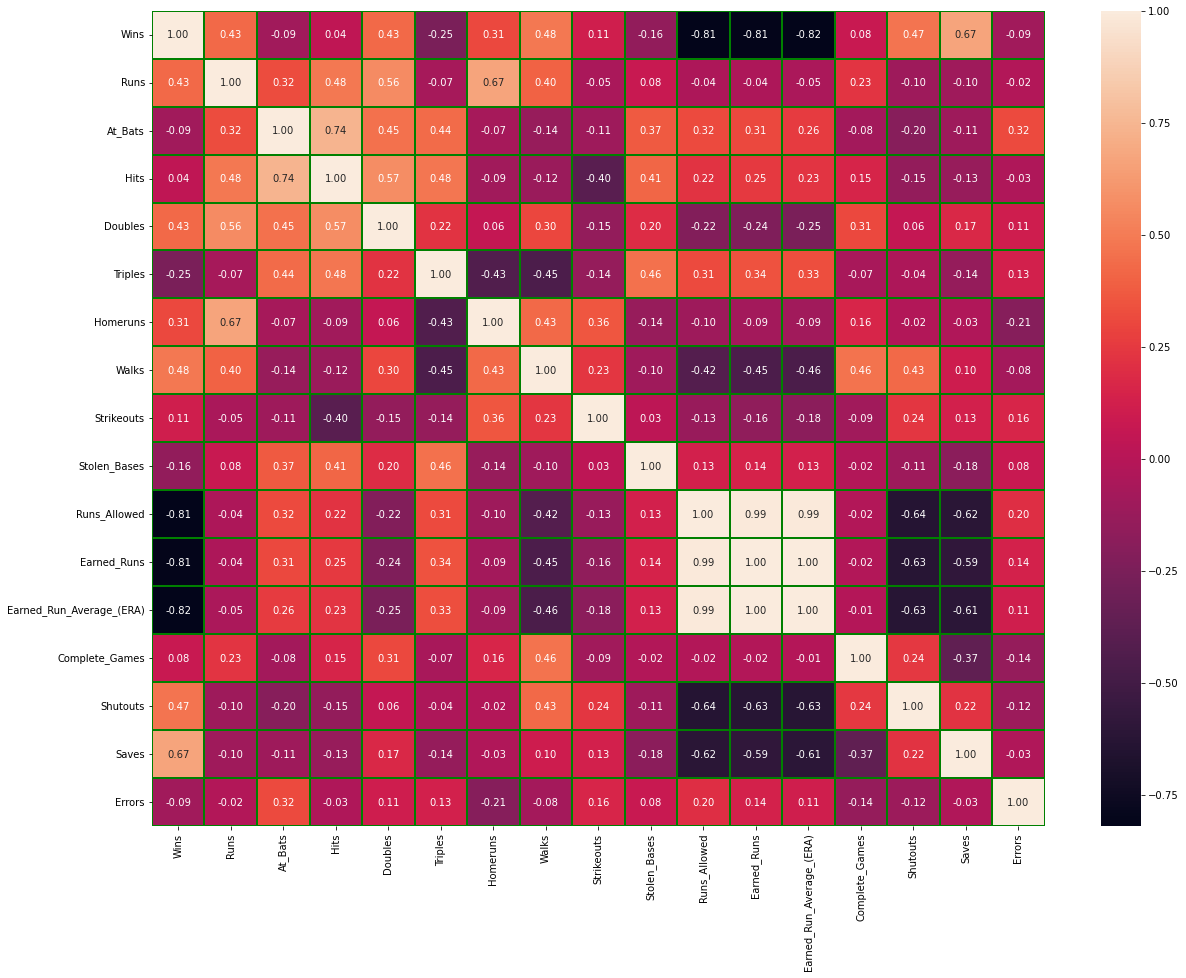

In [115]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(), annot= True, linecolor= "green",  linewidths= 0.2, fmt='0.2f' )
plt.show()


<AxesSubplot:title={'center':'feature vs Wins corr'}>

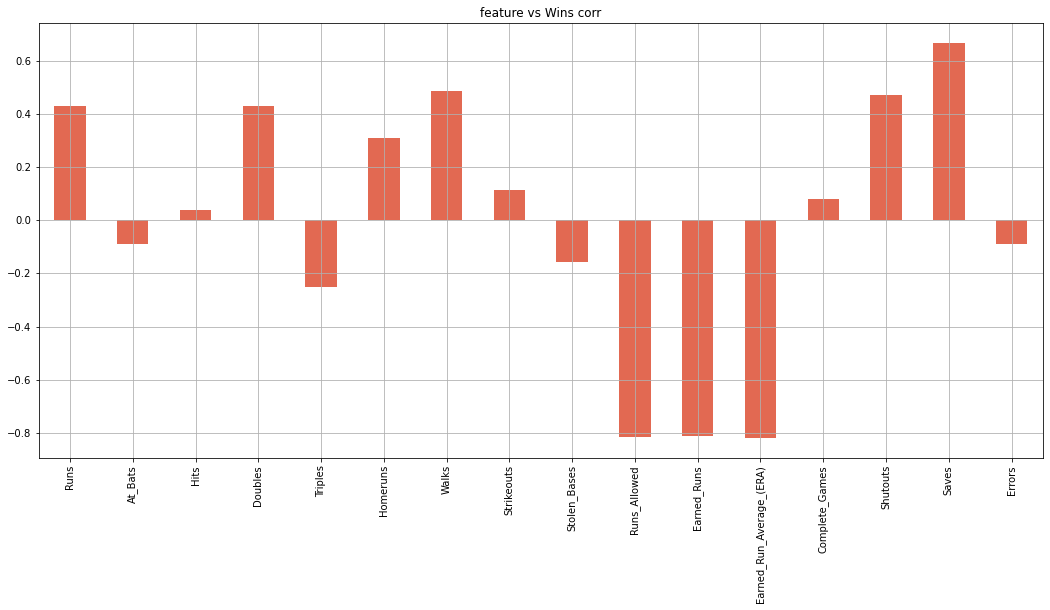

In [117]:
df.drop("Wins", axis=1).corrwith(df["Wins"]).plot(kind='bar',figsize=(18,8),grid='True',title='feature vs Wins corr')

In [118]:
# Observations:

# Runs_Allowed,Earned_Runs and Earned_Run_Average_(ERA) are highly correlated with each other.

# Light shade means Strong Positive correlation

# Darker shade means Strong Negetive correlation

# Runs_Allowed,Earned_Runs, Earned_Run_Average_(ERA) are highly correlated with Wins(negetive relation)

# Hits, At_bats and errors have very less correlation with Wins

# At_Bat and Hits are 0.74 correlated with each other but very poor correlated with Wins.

# At this moment not removing any features as data set is small. Will check later

# Checking Outliers:

In [119]:
# From the previous Boxplot , it is seen that there is some outiers in Errors columns. Let's remove it.

# Using Z score method:

In [121]:
from scipy.stats import zscore
z = np.abs(zscore(df))
print(np.where(z>3))

(array([5]), array([1]))


In [122]:
df_new = df[(z<3).all(axis = 1)]
df_new.head()

Wins  Runs  At_Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen_Bases  Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  \
0           104           641          601                      3.73   
1            70           700          653                      4.07   
2            86           640          584                      3.67   
3            68           701          643                      3.98   
4            83           803          746                      4.64   

   Complete_Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  
2              11        10     38      79  
3               7         9     37     101  
4               7        12     35      86

In [123]:
df_new.shape

(29, 17)

In [124]:
df.shape

(30, 17)

In [125]:
# Previous rows were 30, and the loss of data= (30-29)=1 datapoint

In [128]:
data_loss=(30-29)/30*100
data_loss

3.3333333333333335

Wins                           AxesSubplot(0.125,0.657941;0.110714x0.222059)
Runs                        AxesSubplot(0.257857,0.657941;0.110714x0.222059)
At_Bats                     AxesSubplot(0.390714,0.657941;0.110714x0.222059)
Hits                        AxesSubplot(0.523571,0.657941;0.110714x0.222059)
Doubles                     AxesSubplot(0.656429,0.657941;0.110714x0.222059)
Triples                     AxesSubplot(0.789286,0.657941;0.110714x0.222059)
Homeruns                       AxesSubplot(0.125,0.391471;0.110714x0.222059)
Walks                       AxesSubplot(0.257857,0.391471;0.110714x0.222059)
Strikeouts                  AxesSubplot(0.390714,0.391471;0.110714x0.222059)
Stolen_Bases                AxesSubplot(0.523571,0.391471;0.110714x0.222059)
Runs_Allowed                AxesSubplot(0.656429,0.391471;0.110714x0.222059)
Earned_Runs                 AxesSubplot(0.789286,0.391471;0.110714x0.222059)
Earned_Run_Average_(ERA)          AxesSubplot(0.125,0.125;0.110714x0.222059)

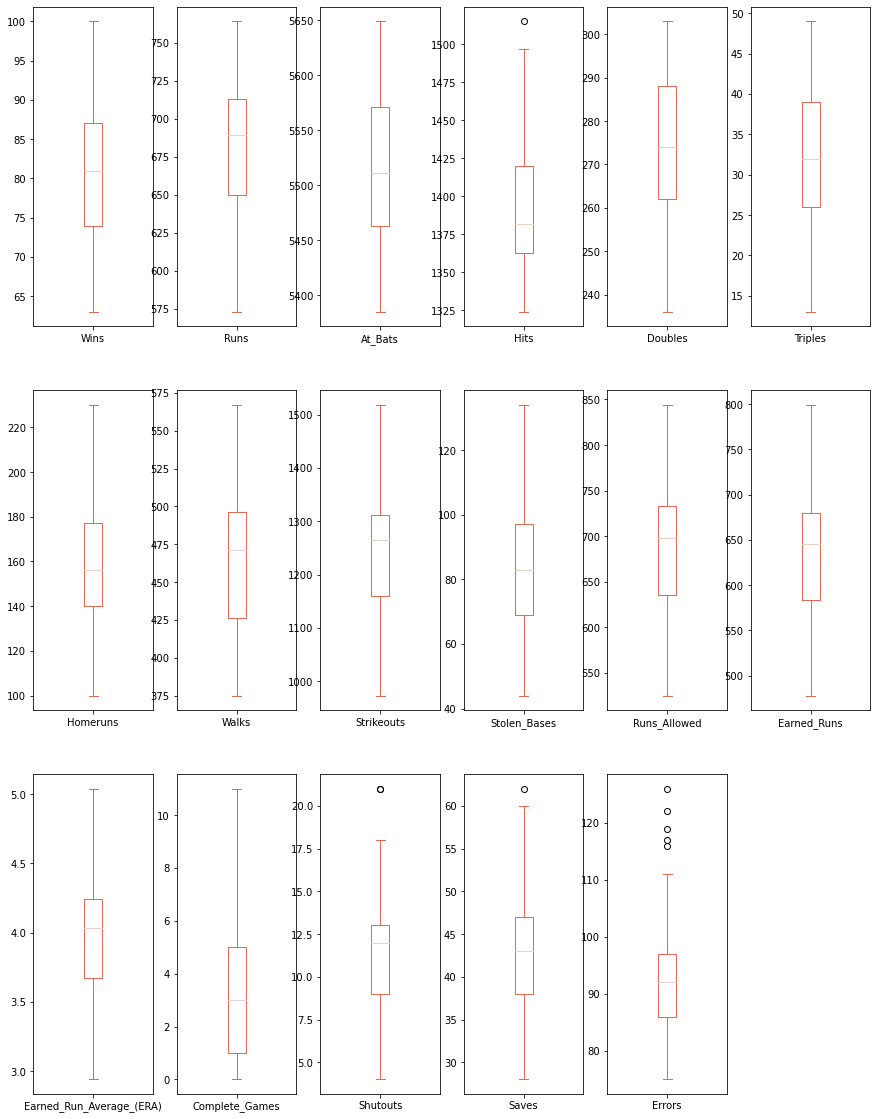

In [126]:
df_new.plot(kind ='box', subplots =True , layout =(3,6), figsize = (15,20), )

In [129]:
# Observations:

# Mainly outiers are present in Errors columns

# After removing outliers by Z score method it is seen that still there is some outliers in errors column.

# As the dataset is not big (30 rows), 
# let's keep the remaining part as the deletation made the loss of data which means the loss of informations.

# Checking Skewness:

In [130]:
df_new.skew()

Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Games              0.854980
Shutouts                    0.526943
Saves                       0.627480
Errors                      0.840271
dtype: float64

In [144]:
# Observations:

# The standard range for skewness is between -0.5 to 0.5.

#Shutouts, Saves, Complete_Games snd Errors are positively skewed in nature, need to transform.

# Let's transform all the positive skewed data using boxcox transformation:

In [154]:
df3= df_new.copy()
df3.head()

Wins  Runs  At_Bats  Hits  Doubles  Triples  Homeruns  Walks  Strikeouts  \
0    95   724     5575  1497      300       42       139    383         973   
1    83   696     5467  1349      277       44       156    439        1264   
2    81   669     5439  1395      303       29       141    533        1157   
3    76   622     5533  1381      260       27       136    404        1231   
4    74   689     5605  1515      289       49       151    455        1259   

   Stolen_Bases  Runs_Allowed  Earned_Runs  Earned_Run_Average_(ERA)  \
0           104           641          601                      3.73   
1            70           700          653                      4.07   
2            86           640          584                      3.67   
3            68           701          643                      3.98   
4            83           803          746                      4.64   

   Complete_Games  Shutouts  Saves  Errors  
0               2         8     56      88  
1               2        12     45      86  
2              11        10     38      79  
3               7         9     37     101  
4               7        12     35      86

In [155]:
from sklearn.preprocessing import PowerTransformer
scaler= PowerTransformer(method= 'yeo-johnson')

features=[ 'Shutouts', 'Saves', 'Complete_Games','Errors']
df3[features]= scaler.fit_transform(df3[features].values)
df3[features].head()

Shutouts     Saves  Complete_Games    Errors
0 -0.787002  1.532753       -0.307098 -0.348265
1  0.236737  0.312020       -0.307098 -0.540820
2 -0.252844 -0.664137        2.011315 -1.326125
3 -0.513555 -0.820689        1.264463  0.650818
4  0.236737 -1.149165        1.264463 -0.540820

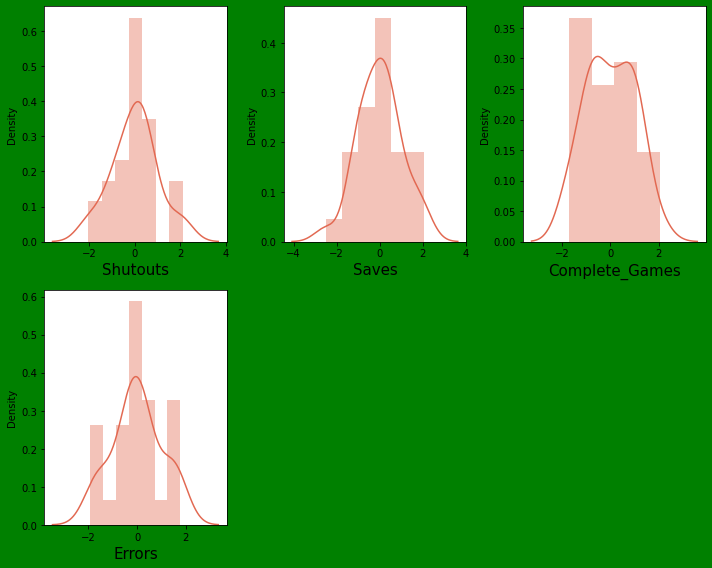

In [156]:
plt.figure(figsize=(10,8),facecolor='green')
plno=1
for x in df2[features]:
    if plno<=5:
        plt.subplot(2,3,plno)
        sns.distplot(df2[x])
        plt.xlabel (x, fontsize=15)
    plno +=1
plt.tight_layout()

In [157]:
# Skewness after transforming skewed features

df3.skew()


Wins                        0.119013
Runs                       -0.215364
At_Bats                     0.169573
Hits                        0.783772
Doubles                    -0.335304
Triples                     0.090124
Homeruns                    0.450862
Walks                       0.151193
Strikeouts                 -0.233815
Stolen_Bases                0.494966
Runs_Allowed                0.018155
Earned_Runs                 0.018461
Earned_Run_Average_(ERA)    0.016693
Complete_Games             -0.045947
Shutouts                    0.000529
Saves                      -0.000925
Errors                      0.065585
dtype: float64

In [152]:
# Observations:

# All skewness are removed from the whole dataset.

# Check Multicollinearity problem:

In [158]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif["VIF"]= [variance_inflation_factor(df3,i)for i in range(df3.shape[1])]
vif["Features"] = df3.columns
vif

VIF                  Features
0    1115.170177                      Wins
1    2623.696823                      Runs
2    6043.001567                   At_Bats
3    4427.809695                      Hits
4    1050.379253                   Doubles
5      35.913413                   Triples
6     282.507924                  Homeruns
7     273.257008                     Walks
8     416.602047                Strikeouts
9      27.335036              Stolen_Bases
10  19312.562775              Runs_Allowed
11  61992.587890               Earned_Runs
12  26932.522960  Earned_Run_Average_(ERA)
13      3.470894            Complete_Games
14      3.401717                  Shutouts
15      8.942298                     Saves
16      2.131508                    Errors

In [219]:
# Observations:

# The vIF is high on few of the features
# The reasons may be:

# Runs_Allowed, Earned_Runs, Earned_Run_Average_(ERA) are highly correlated with each other.
# Some of the features are correlated with each other but less correlation with target variables.

# Not dropping anything at this moment, will decide based on feature selection.


# Feature Selection Using PCA:

# Data Standarization:

In [159]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

#seperate Features(x) and Lable(y)
x=df3.drop(columns=['Wins'])
y=df3['Wins']

#data standarization
x_scale= scaler.fit_transform(x)

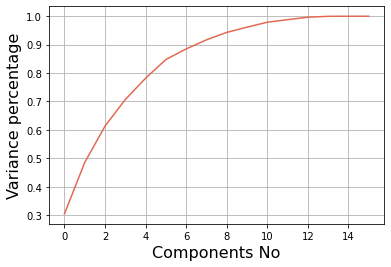

In [160]:
from sklearn.decomposition import PCA
pca = PCA()

#plot the graph to find the principal components

x_pca = pca.fit_transform(x_scale)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Components No', fontsize= 16)
plt.ylabel('Variance percentage', fontsize= 16)
plt.grid()
plt.show()

In [161]:
# Observations:

# For components= 10, the variance percentage is >0.95 i.e. greater than 95%.

# Let's keep top 10 features for model evaluation

In [162]:
pca_new = PCA(n_components=10)
x_scale_new = pca_new.fit_transform(x_scale)
x_scale_final= pd.DataFrame(x_scale_new)

In [163]:
x_scale_final.head()

0         1         2         3         4         5         6  \
0  1.064040 -2.947962  2.318005 -0.541256 -2.345133 -0.419101  0.901606   
1  0.017477  0.431453  0.324488 -0.024014 -0.308448  0.376552 -0.826150   
2 -1.215219 -0.811042  0.145045  2.755823 -0.547650 -0.655610  1.486334   
3  0.702158  1.453251  0.699999  0.737421  0.562382 -1.103634 -0.178812   
4  3.423548 -1.456388 -0.601993  1.711171  0.054276  0.254134 -1.174689   

          7         8         9  
0  0.488742  0.687642 -0.530180  
1  1.466884  0.079943 -0.113867  
2  0.881422  0.060013  1.228888  
3 -0.232122  0.367705  0.474132  
4  0.275220 -1.179515  0.180386

In [164]:
# check VIF after feature selection:

vif_final= pd.DataFrame()
vif_final['VIF']= [variance_inflation_factor(x_scale_final.values,i) for i in range(x_scale_final.shape[1])]
vif_final['Top 10 Features']= x_scale_final.columns
vif_final

VIF  Top 10 Features
0  1.0                0
1  1.0                1
2  1.0                2
3  1.0                3
4  1.0                4
5  1.0                5
6  1.0                6
7  1.0                7
8  1.0                8
9  1.0                9

# Final predictions using different Regression ML Models:

# Find best Random state:

In [165]:
from sklearn.linear_model import LinearRegression

r2_max=0
random_max=0
for i in range(1,2000):
    x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=i)
    lin_reg= LinearRegression()
    
    lin_reg.fit(x_train,y_train)
    y_pred=lin_reg.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    
    if r2>r2_max:
        r2_max=r2
        random_max=i
print('Best accuracy is', r2_max ,'on Random_state', random_max)

Best accuracy is 0.9624866812421273 on Random_state 841


In [166]:
print('Training feature shape:',x_train.shape)
print('Training target shape:',y_train.shape)
print('Test feature shape:',x_test.shape)
print('Test target shape:',y_test.shape)

Training feature shape: (21, 10)
Training target shape: (21,)
Test feature shape: (8, 10)
Test target shape: (8,)


In [168]:
# Observations:

# For random state=841, the accuracy score is best. Lets take this random state for further steps.

# Using LinearRegression()

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x_scale_final,y,test_size = 0.25, random_state=841)

lin_reg= LinearRegression()

lin_reg.fit(x_train, y_train)

y_pred = lin_reg.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9624866812421273
Mean absolute error: 1.9949095654748117
Mean square error: 5.607655008696366
Root mean square error: 2.3680487766717064


# Using GridSearchCV:

In [172]:
from sklearn.model_selection import GridSearchCV

grid = dict(fit_intercept=['True', 'False'], n_jobs=[1,-1])

grid_lin = GridSearchCV(estimator=lin_reg, param_grid= grid, cv=9)

grid_lin.fit(x_train, y_train)
grid_lin.best_params_

{'fit_intercept': 'True', 'n_jobs': 1}

In [173]:
grid_lin_best = LinearRegression(fit_intercept= 'True', n_jobs= 1)

grid_lin_best.fit(x_train, y_train)
y_pred = grid_lin_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.9624866812421273
Mean absolute error: 1.9949095654748117
Mean square error: 5.607655008696366
Root mean square error: 2.3680487766717064


In [174]:
# Observations:

# No such improvement seen after GridSearchCV.

# Using DecisionTreeRegressor():

In [175]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

y_pred = dt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5451029580850841
Mean absolute error: 7.25
Mean square error: 68.0
Root mean square error: 8.246211251235321


# Using GridSearchCV:

In [176]:
param = {'criterion' : ["squared_error", "friedman_mse", "absolute_error"],
    'max_depth' : range(15,30),
    'min_samples_split' : range(1,4),
    'splitter' : ["best", "random"],
    'min_samples_leaf' : range(1,4)}

grid_search = GridSearchCV(estimator = dt,cv=9,param_grid = param)
grid_search.fit(x_train, y_train)

print("Best Parameters:" , grid_search.best_params_)

Best Parameters: {'criterion': 'absolute_error', 'max_depth': 23, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}


In [177]:
grid_dt_best = grid_search.best_estimator_
grid_dt_best.fit(x_train, y_train)

y_pred = grid_dt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: -0.11382878645343375
Mean absolute error: 10.0
Mean square error: 166.5
Root mean square error: 12.90348790056394


In [178]:
# Observations:

# After using Grid seaech CV, R2 is negative.

# When the chosen model does not follow the trend of the data and fits worse, then the r2 score becomes negetive.

# So here we just reject DecisionTreeRegressor() for our model building.




# Using KNeighborsRegressor():

In [179]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
rmse_val = []
for i in range(0, 8):
    i = i+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = i)

    knn.fit(x_train,y_train) 
    y_pred=knn.predict(x_test) 
    error =np. sqrt(mean_squared_error(y_test,y_pred)) 
    rmse_val.append(error) 
    print('RMSE value for k= ' , i , 'is:', error)


RMSE value for k=  1 is: 9.433981132056603
RMSE value for k=  2 is: 9.117291264405235
RMSE value for k=  3 is: 8.045012257431447
RMSE value for k=  4 is: 7.159456159513794
RMSE value for k=  5 is: 7.2759879054325
RMSE value for k=  6 is: 7.1063352017759485
RMSE value for k=  7 is: 7.514951084066907
RMSE value for k=  8 is: 8.06092523380536


In [180]:
min(rmse_val)

7.1063352017759485

In [181]:
# For k=6 we get the best RMSE value for KNeighborsRegressor()

In [182]:
knn =KNeighborsRegressor(n_neighbors= 6)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.662172049754364
Mean absolute error: 6.166666666666668
Mean square error: 50.500000000000014
Root mean square error: 7.1063352017759485


# Using GridSearchCV

In [183]:
param = {'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute'],
             'leaf_size' : [30,40,25,34,10,15,22], 'n_jobs':[1,-1],
             'n_neighbors' : [4],'weights': ['uniform', 'distance'], 'p':[1,2,3]}
    

gridsearchknn = GridSearchCV(estimator = knn, param_grid=param, cv=5)

gridsearchknn.fit(x_train, y_train) 

print("Best Parameters:" , gridsearchknn.best_params_)

Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_jobs': 1, 'n_neighbors': 4, 'p': 3, 'weights': 'distance'}


In [184]:
grid_knn_best = gridsearchknn.best_estimator_

grid_knn_best.fit(x_train, y_train)

y_pred = grid_knn_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6253305784745344
Mean absolute error: 6.081468950184954
Mean square error: 56.007224308345755
Root mean square error: 7.4837974523864395


In [185]:
# Observations:

# Nothing is improved after GridSearchCV.

# Using RandomForestRegressor():

In [186]:
from sklearn.ensemble import RandomForestRegressor

rf= RandomForestRegressor()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5267246994878227
Mean absolute error: 7.286250000000001
Mean square error: 70.7472625
Root mean square error: 8.41113919157209


# Using GridSearchCV:

In [187]:
params = {'n_estimators' : [100,110,80], 'criterion' : ["squared_error", "absolute_error"], 
          'min_samples_split' : [3,2,1], 'n_jobs': [1,-1], 'min_samples_leaf' : [1,2,3]}

rf_grd = GridSearchCV(rf, param_grid = params)
rf_grd.fit(x_train, y_train)
print('best params : ', rf_grd.best_params_)

best params :  {'criterion': 'squared_error', 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 80, 'n_jobs': 1}


In [188]:
grid_rf_best = rf_grd.best_estimator_

grid_rf_best.fit(x_train, y_train)

y_pred = grid_rf_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.4897391854308317
Mean absolute error: 7.61307229662698
Mean square error: 76.27601895286301
Root mean square error: 8.733614312119755


In [189]:
# Observations:

# Nothing is improved after GridSearchCV.

# Using Support Vector Regression():

In [190]:
from sklearn.svm import SVR
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(x_train, y_train)

y_pred = svr_rbf.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.09669444563684815
Mean absolute error: 9.519987499221177
Mean square error: 135.03006622800427


In [192]:
from sklearn.svm import SVR
svr_lin = SVR(kernel='linear')
svr_lin.fit(x_train, y_train)

y_pred = svr_lin.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))

R2 Score: 0.8256084837881907
Mean absolute error: 4.306431080845137
Mean square error: 26.06880680622467


# Using GridSearchCV:

In [193]:
params = {'gamma':['scale', 'auto'],'C':[1.0,10,10, 0.5,0.1,0.001], 'tol':[0.01,0.001,0.002,0.0001], 'kernel':['linear']}

svr_grd = GridSearchCV(svr_lin, param_grid = params, cv= 7)
svr_grd.fit(x_train, y_train)
print('best params : ', svr_grd.best_params_)

best params :  {'C': 0.5, 'gamma': 'scale', 'kernel': 'linear', 'tol': 0.01}


In [195]:
grid_svr_best = svr_grd.best_estimator_
grid_svr_best.fit(x_train, y_train)

y_pred = grid_svr_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.7675551801981118
Mean absolute error: 4.879998689073455
Mean square error: 34.74686861007288
Root mean square error: 5.894647454265003


In [196]:
# Observations:

# Nothing is improved after GridSearchCV.

# Using GradientBoostingRegressor()

In [197]:
from sklearn.ensemble import  GradientBoostingRegressor

gbdt= GradientBoostingRegressor()
gbdt.fit(x_train, y_train)

y_pred = gbdt.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5371548476691583
Mean absolute error: 6.995260978577253
Mean square error: 69.18811831795566
Root mean square error: 8.317939547625702


# Using GridSearchCV:

In [198]:
params = {'loss': ['squared_error', 'absolute_error', 'huber', 'quantile'], 'n_estimators':[100,150,80],
          'criterion':['friedman_mse', 'squared_error', 'mse'], 'min_samples_leaf':range(1,5),
         'max_features': ['auto', 'sqrt', 'log2']}

gbdt_grd = GridSearchCV(gbdt, param_grid = params, cv=5)
gbdt_grd.fit(x_train, y_train)
print('best params : ', gbdt_grd.best_params_)

best params :  {'criterion': 'friedman_mse', 'loss': 'absolute_error', 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 150}


In [199]:
grid_gbdt_best = gbdt_grd.best_estimator_

grid_gbdt_best.fit(x_train, y_train)

y_pred = grid_gbdt_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6789914554164803
Mean absolute error: 6.159750707308611
Mean square error: 47.98576165672708
Root mean square error: 6.927175590146902


In [200]:
# Observations:

# r2 score, RMSE are improved after GridSearchCV.

# Using AdaBoostRegressor():

In [201]:
from sklearn.ensemble import AdaBoostRegressor

ada= AdaBoostRegressor()
ada.fit(x_train, y_train)

y_pred = ada.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.5969696474108963
Mean absolute error: 6.821428571428571
Mean square error: 60.24674036281179
Root mean square error: 7.761877373600526


# Using GridSearchCV:

In [202]:
params = { 'loss' : ['linear', 'square'], 'learning_rate': [0.1,0.001,1,0.5] ,
        'n_estimators':[50,90,40] }

ada_grd = GridSearchCV(ada, param_grid = params, cv=5)
ada_grd.fit(x_train, y_train)
print('best params : ', ada_grd.best_params_)

best params :  {'learning_rate': 1, 'loss': 'square', 'n_estimators': 40}


In [203]:
grid_ada_best = ada_grd.best_estimator_

grid_ada_best.fit(x_train, y_train)

y_pred = grid_ada_best.predict(x_test)

print('R2 Score:', r2_score(y_test, y_pred))
print('Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('Mean square error:', mean_squared_error(y_test, y_pred))
print('Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

R2 Score: 0.6425776105362182
Mean absolute error: 6.69375
Mean square error: 53.4290625
Root mean square error: 7.309518623001107


In [204]:
# Observations:

# r2 score, RMSE are improved after GridSearchCV.

# As per 7 different regression model we can see that the model with maximum R2 score and minimum RMSE value is LinearRegression().

In [205]:
# Let's check the cross validation score before final prediction.

# Cross Validation:

In [206]:
from sklearn.model_selection import cross_val_score

all_models = [lin_reg , dt , knn , grid_rf_best , svr_lin , grid_gbdt_best, ada]

for i in all_models:
    cvscore = cross_val_score(i, x_scale,y, cv = 5)
    print('Cross Validation Score of :',i)
    print("\n Cross Validation Score : " ,cvscore)
    print("\nMean CV Score :",cvscore.mean())
    print("\nStd deviation :",cvscore.std())
    print("\n-----------")
    print("-----------")

Cross Validation Score of : LinearRegression()

 Cross Validation Score :  [ 0.64575684 -0.31470899  0.54456828 -0.24471997 -0.4022994 ]

Mean CV Score : 0.04571935186656302

Std deviation : 0.452521740235585

-----------
-----------
Cross Validation Score of : DecisionTreeRegressor()

 Cross Validation Score :  [-2.51818182 -9.60526316  0.23881221 -0.36393443  0.53714623]

Mean CV Score : -2.3422841926855122

Std deviation : 3.78546825143939

-----------
-----------
Cross Validation Score of : KNeighborsRegressor(n_neighbors=6)

 Cross Validation Score :  [ 0.26960227 -2.61147661  0.41621358  0.31443534  0.82778105]

Mean CV Score : -0.1566888732653057

Std deviation : 1.2431462699328957

-----------
-----------
Cross Validation Score of : RandomForestRegressor(min_samples_leaf=2, min_samples_split=3, n_estimators=80,
                      n_jobs=1)

 Cross Validation Score :  [ 0.32880818 -4.78827545  0.49136893  0.33857152  0.88320386]

Mean CV Score : -0.5492645918235773

Std devia

# Checking overfitting problem:

In [207]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
#LASSO Regression

lassocv= LassoCV()
lassocv.fit(x_train, y_train)
alpha= lassocv.alpha_   #best learning rate for LASSO
alpha  

2.0031945407266414

In [208]:
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", lasso_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.7501212729759233


In [209]:
#RIDGE Regression

ridgecv= RidgeCV(alphas=np.arange(0.0001, 1.0, 0.001),  normalize= True, cv=10 )
ridgecv.fit(x_train, y_train)
alpha= ridgecv.alpha_   #best learning rate for RIDGE
alpha  

0.1581

In [210]:
ridge_reg=Ridge(alpha)
ridge_reg.fit(x_train,y_train)
print ("Score after applying LASSO regression on the model is :", ridge_reg.score(x_test, y_test))

Score after applying LASSO regression on the model is : 0.9613421404711425


In [211]:
# Observations:

# After using LASSO() and Ridge(), there is no large change in score. So this model is not OVERFITTED.

# Conclusion:

In [212]:
# Our final model is Linear Regression() for this particular dataset

# Final Model:

In [213]:
y_pred = lin_reg.predict(x_test)
y_pred

array([ 93.6939483 ,  80.68726799,  80.61678336,  90.87391932,
        69.11286238, 100.280856  ,  86.37801181,  61.56199801])

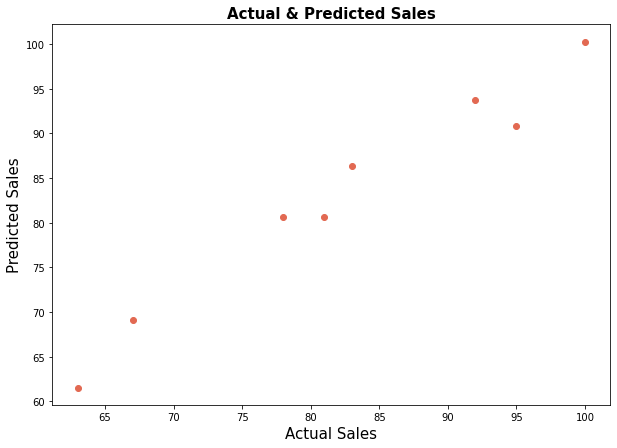

In [214]:
# Let's visualize the variation of actual test data and predicted data
plt.figure(figsize=(10,7))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Sales", fontsize= 15)
plt.ylabel("Predicted Sales",fontsize= 15)
plt.title("Actual & Predicted Sales" , fontsize= 15, fontweight= 'bold')
plt.show()

In [215]:
print('Final R2 Score:', r2_score(y_test, y_pred))
print('\nFinal Mean absolute error:', mean_absolute_error(y_test, y_pred))
print('\nFinal Mean square error:', mean_squared_error(y_test, y_pred))
print('\nFinal Root mean square error:',np.sqrt( mean_squared_error(y_test, y_pred)))

Final R2 Score: 0.9624866812421273

Final Mean absolute error: 1.9949095654748117

Final Mean square error: 5.607655008696366

Final Root mean square error: 2.3680487766717064


# Coefficient:

In [216]:
coefficient= lin_reg.coef_
coefficient

array([-3.57176223, -2.80182869, -0.26511487, -1.14111024, -1.4373883 ,
       -0.80777988, -0.67275432,  1.00541553,  0.3336605 , -3.56711654])

# Load and save the model

In [217]:
# Now , let's save the model for future use.

import pickle
pickle.dump(lin_reg, open("Baseball_Prediction_model", "wb"))
load_Baseball_Prediction_model= pickle.load(open("Baseball_Prediction_model", "rb"))

In [218]:
y_pred = load_Baseball_Prediction_model.predict(x_test)

y_test = np.array(y_test)
data_prediction_by_model = pd.DataFrame()
data_prediction_by_model["Predicted Values"] = y_pred
data_prediction_by_model["Actual Values"] = y_test
data_prediction_by_model.sample(n=6)

Predicted Values  Actual Values
1         80.687268             81
4         69.112862             67
0         93.693948             92
5        100.280856            100
3         90.873919             95
6         86.378012             83